In [275]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import sys
from gene_datasets import get_gene_dataset

# OncMTR Plotting toolkit

In [244]:
gnomad_oncmtr_df = pd.read_csv('../../out/OncMTR-gnomad-win31/All_OncMTR_scores-gnomad-win31.tsv', sep='\t')
gnomad_oncmtr_pairs_df = pd.read_csv('../../out/OncMTR-gnomad-win31/OncMTR_signal_pairs_df-gnomad-win31.tsv', sep='\t')

In [245]:
gnomad_oncmtr_pairs_df.head()

,Gene,ENST_ID,MTR,MTR_ab
0,CSMD3,ENST00000297405,"0.91797, 0.91947, 0.91254, 0.93538, 0.92111, 0...","0.91797, 0.91947, 0.91254, 0.93538, 0.92111, 0..."
1,GLOD4,ENST00000575528,"0.80635, 0.84823, 0.83771, 0.86965, 0.81704, 0...","0.80635, 0.84823, 0.83771, 0.86965, 0.81704, 0..."
2,AC098582.1,ENST00000513325,"1.31915, 1.30392, 1.19439, 1.18421, 1.19496, 1...","1.31915, 1.30392, 1.19439, 1.18421, 1.19496, 1..."
3,ZCCHC10,ENST00000355372,"1.06211, 1.08093, 1.06982, 1.06909, 1.05981, 1...","1.0487, 1.06856, 1.05758, 1.05686, 1.04769, 1...."
4,PPFIA3,ENST00000602897,"0.325, 0.26226, 0.21681, 0.18487, 0.18629, 0.3...","0.325, 0.26226, 0.21681, 0.18487, 0.18629, 0.3..."


In [296]:
def plot_onmtr(enst_ids=[], gene=None, method='pair'):
    """
        - enst_ids: provide a list of ENST_IDs to plot
        - gene: when a gene name is provided, enst_ids is bypassed (if defined) and replaced
                by all transcripts corresponding to the specified gene
        - method: pair -> render two plots, for the MTR and MTR_AB-filtered scores
                  single -> render a single OncMTR plot (diff of MTR and MTR_AB-filtered)
    """
    
    if gene:
        enst_ids = gnomad_oncmtr_pairs_df.loc[ gnomad_oncmtr_pairs_df.Gene == gene, 'ENST_ID'].values

    for enst_id in enst_ids:
        try:
            cur_gene = gnomad_oncmtr_pairs_df.loc[ gnomad_oncmtr_pairs_df.ENST_ID == enst_id, 'Gene'].values[0]
        except:
            continue
            
        if method == 'pair':
            mtr_scores = gnomad_oncmtr_pairs_df.loc[ gnomad_oncmtr_pairs_df.ENST_ID == enst_id, 'MTR']
            mtr_scores = list(eval(mtr_scores.values.tolist()[0].replace('nan', 'np.nan')))

            mtr_ab_scores = gnomad_oncmtr_pairs_df.loc[ gnomad_oncmtr_pairs_df.ENST_ID == enst_id, 'MTR_ab']
            mtr_ab_scores = list(eval(mtr_ab_scores.values.tolist()[0].replace('nan', 'np.nan')))

            _ = plt.figure(figsize=(15,6))
            plt.plot(mtr_scores, label='MTR')
            plt.plot(mtr_ab_scores, label='MTR_ab')
            plt.ylabel('MTR scores')
            plt.xlabel('Transcript position')
            plt.title(cur_gene + ' - ' + enst_id)
            plt.legend(loc='lower left', fontsize=14)

        elif method == 'single':
            oncmtr_scores = gnomad_oncmtr_df.loc[ gnomad_oncmtr_df.ENST_ID == enst_id, 'OncMTR']
            oncmtr_scores = list(eval(oncmtr_scores.tolist()[0].replace('nan', 'np.nan')))

            _ = plt.figure(figsize=(15,6))
            plt.plot(oncmtr_scores, label='gnomAD')
            plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
            plt.ylabel('OncMTR')
            plt.xlabel('Transcript position')
            plt.title(cur_gene + ' - ' + enst_id)

<br>

## Plot OncMTR plots (as _pairs_) for all transcripts of a gene

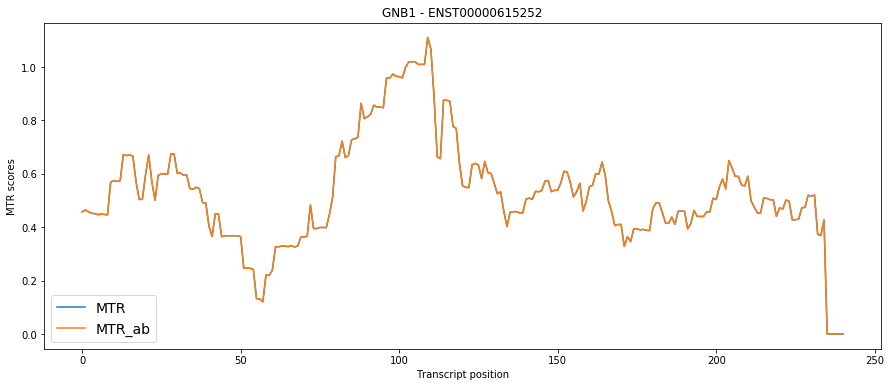

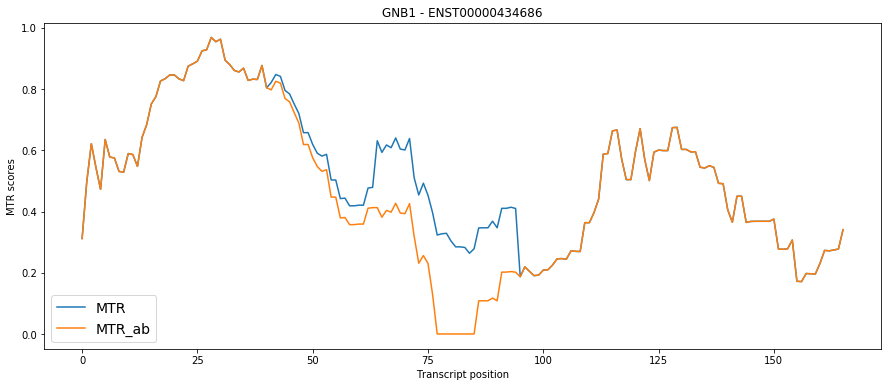

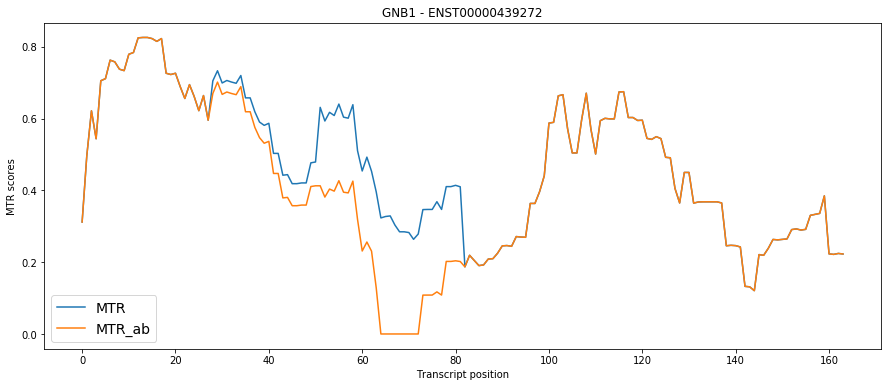

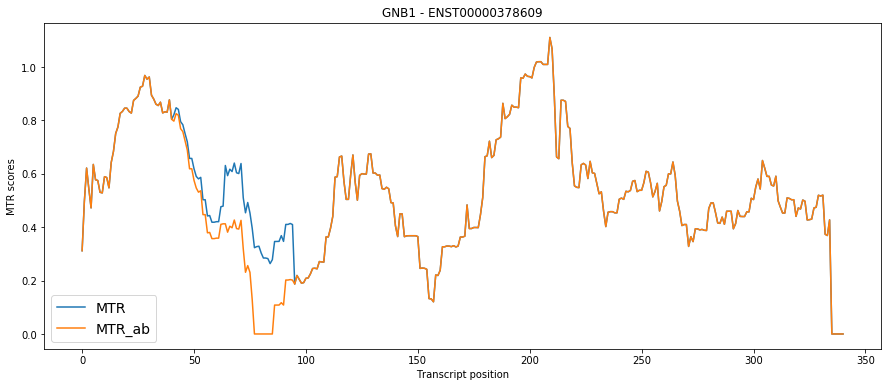

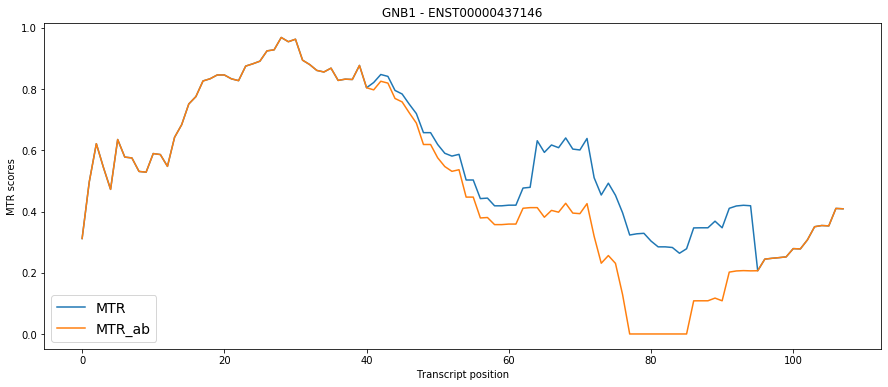

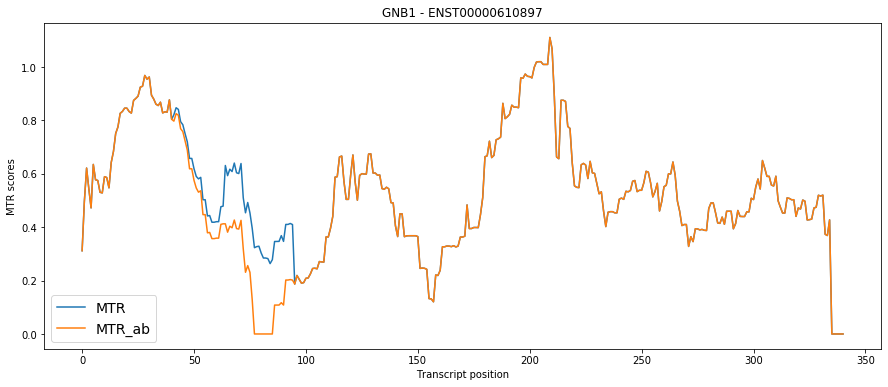

In [287]:
plot_onmtr(method='pair', gene='GNB1')

<br>

## Plot OncMTR plots (as _single_ plot) for all transcripts of a gene

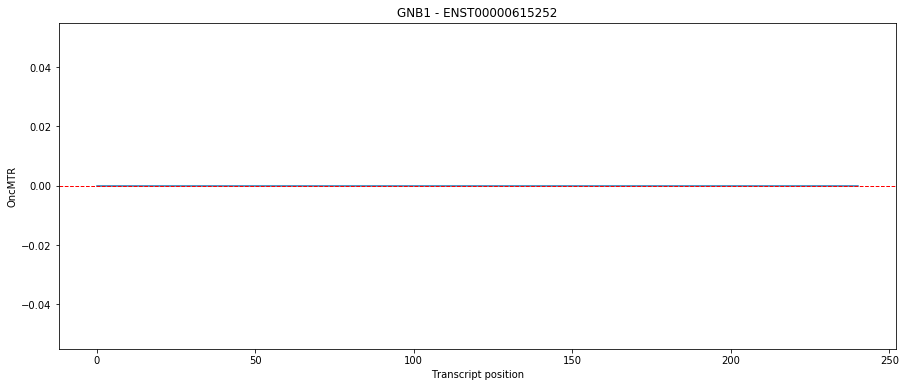

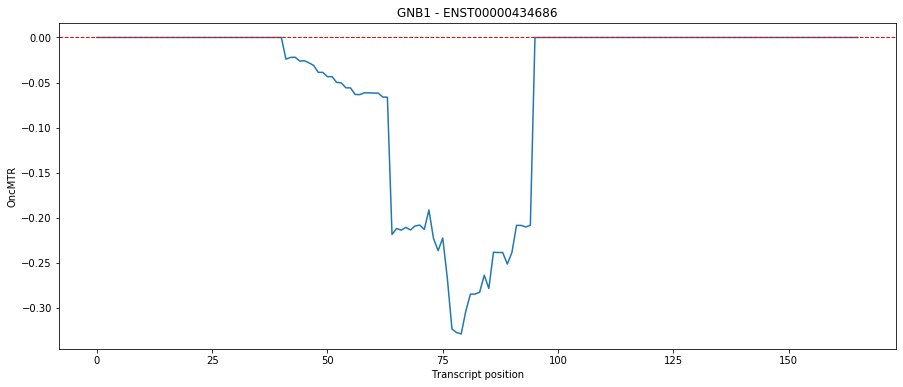

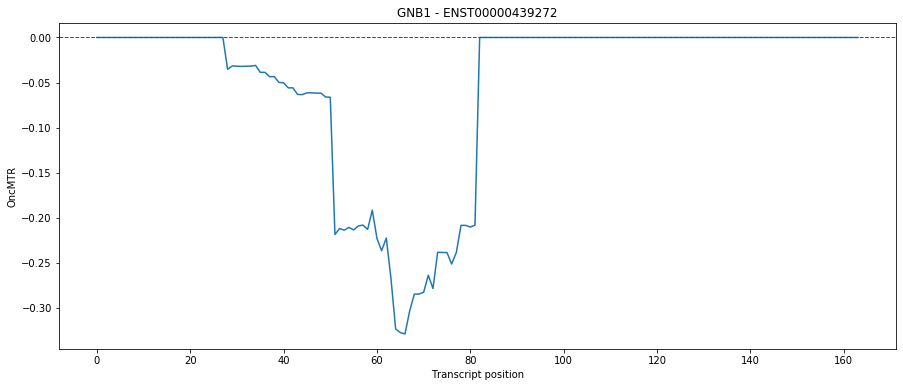

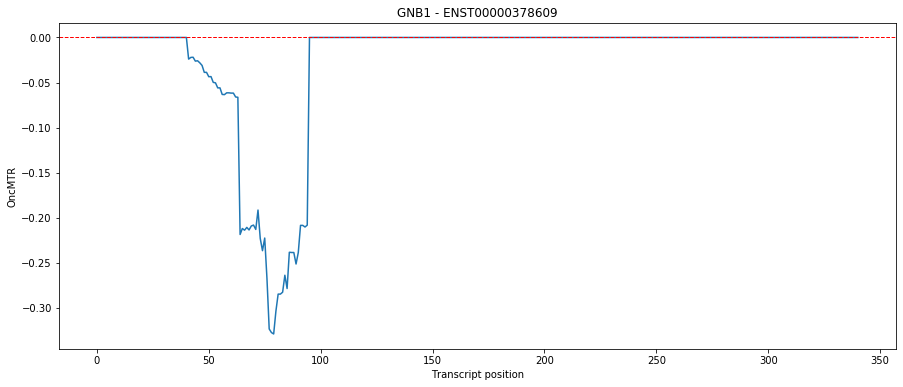

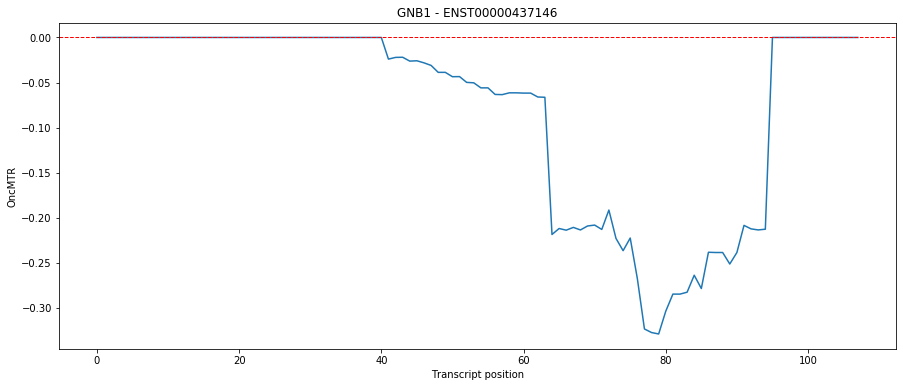

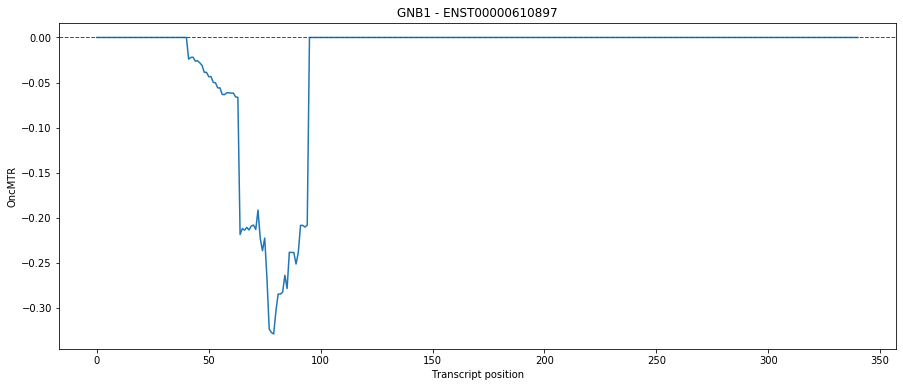

In [230]:
plot_onmtr('ENST00000333843', method='single', gene='GNB1')

<br>

### Identify transcripts with constant MTR scores to discard as non-informative

In [247]:
def find_constant_mtrs_to_discard(x):
    x_mtr = x['MTR'].replace('nan', 'np.nan')
    cur_mtr = np.array(eval(x_mtr))
    
    if np.max(cur_mtr) == np.min(cur_mtr):
        return True
    else:
        return False
    
constant_mtrs = gnomad_oncmtr_pairs_df.apply(find_constant_mtrs_to_discard, axis=1)

In [248]:
constant_mtr_enstids = gnomad_oncmtr_pairs_df.loc[ constant_mtrs.loc[ constant_mtrs == True].index, 'ENST_ID' ].values

<br><br>
<hr>

# Process OncMTR distance metrics across all transcripts

In [249]:
df = pd.read_csv('/projects/cgr/users/cgr-ds/kclc950/genic-intolerance-suite/out/OncMTR-gnomad-win31/enstid_dist_metrics.gnomad.tsv.full_metrics', sep='\t')

In [128]:
df.head()

,HGNC,ENST,euclidean,cityblock,sqeuclidean,cosine,correlation,jaccard,chebyshev,canberra,...,trapz_area_ratio,simps_area_ratio,std_diff,cum_diff,norm_cum_diff,mean_diff,covar,cross_correlation,cross_entropy,ENSG
0,CSMD3,ENST00000297405,0.7638,23.1035,0.5834,0.0001,0.0046,0.2969,0.0609,13.1497,...,1.0069,1.0069,0.0109,23.1035,33.5441,0.0062,0.0128,3112.2252,0.0760,ENSG00000164796
1,GLOD4,ENST00000575528,0.0922,0.5069,0.0085,0.0000,0.0029,0.5345,0.0219,0.2820,...,1.0096,1.0096,0.0084,0.5069,1.6631,0.0087,0.0116,50.9847,0.0553,ENSG00000167699
2,AC098582.1,ENST00000513325,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0625,75.0654,0.0151,ENSG00000285385
3,ZCCHC10,ENST00000355372,0.3354,2.6556,0.1125,0.0003,0.0059,0.4706,0.0717,1.6810,...,1.0154,1.0155,0.0200,2.6556,4.2857,0.0142,0.0230,166.1811,0.0461,ENSG00000155329
4,PPFIA3,ENST00000602897,0.4848,2.6518,0.2350,0.0012,0.0077,0.1270,0.1138,3.8230,...,1.0192,1.0192,0.0291,2.6518,2.8413,0.0109,0.0519,92.5271,0.2591,ENSG00000177380


<br>

## Get distance metrics normalised by transcript length

In [250]:
norm_df = df.copy()

for col in df.columns:
    if col in ['HGNC', 'ENST', 'ENSG', 'transcr_len']:
        continue        
    norm_df[col] /= norm_df['transcr_len']

<br>

## Remove entries with constant MTR across the whole transcript

In [251]:
norm_df = norm_df.loc[ ~norm_df.ENST.isin(constant_mtr_enstids) ]

<br>

## Remove short transcripts

In [252]:
min_len = 100
norm_df = norm_df.loc[ norm_df['transcr_len'] >= min_len]

In [253]:
norm_df.shape

(78060, 25)

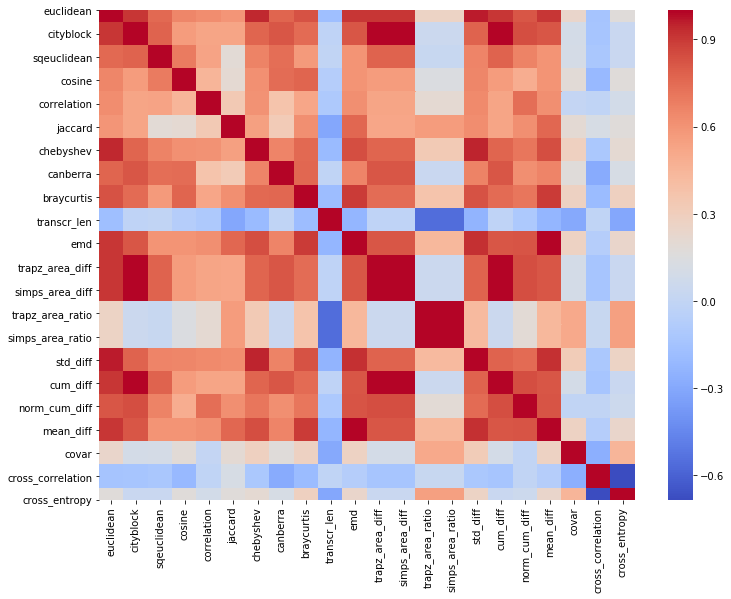

In [263]:
plt.figure(figsize=(12,9))

sns.heatmap(norm_df.corr(), 
        xticklabels=norm_df.corr().columns,
        yticklabels=norm_df.corr().columns, cmap='coolwarm')

In [272]:
pearsonr(norm_df['cum_diff'], norm_df['emd'])

(0.8181825481041386, 0.0)

<br>

# Sort transcripts based on a distance metric

### Available distance metrics
__Prioritised__:
- *cum_diff*
- *norm_cum_diff*
- *cross_entropy*
- *simps_area_diff*
- *simps_area_ratio*

__Extra__:
euclidean, cityblock, sqeuclidean, cosine, correlation, jaccard, 
chebyshev, canberra, braycurtis, emd, trapz_area_diff, 
trapz_area_ratio, std_diff, mean_diff, covar, cross_correlation

In [339]:
oncmtr_dist_metric = 'cum_diff'
gene_set = 'All_prioritised_oncogenes'

<br>
<hr>

# All prioritised oncogenes

/opt/scp/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


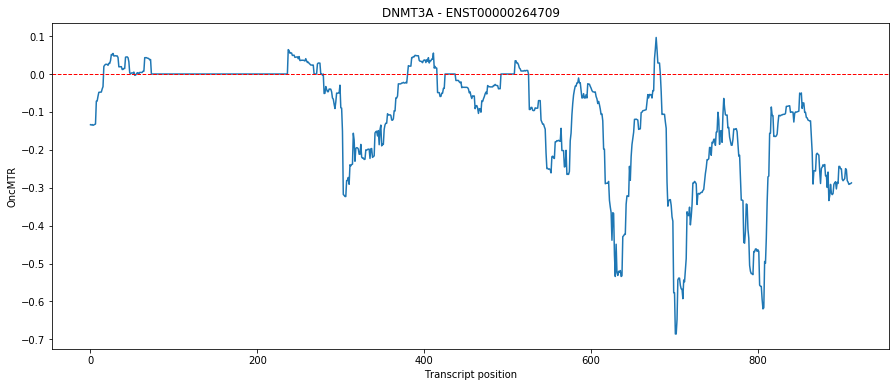

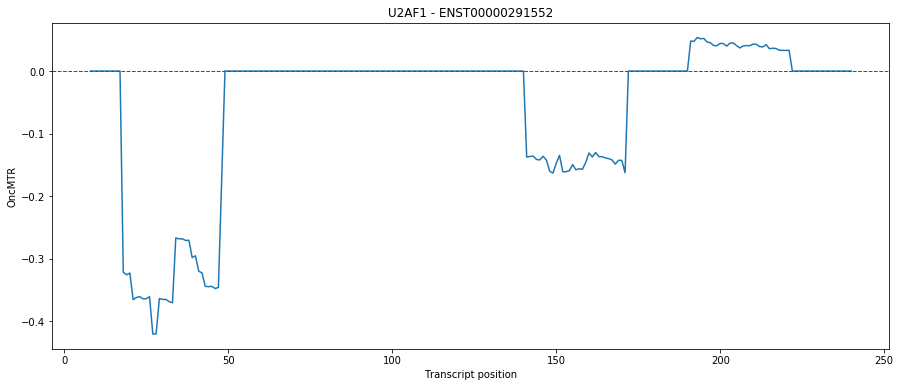

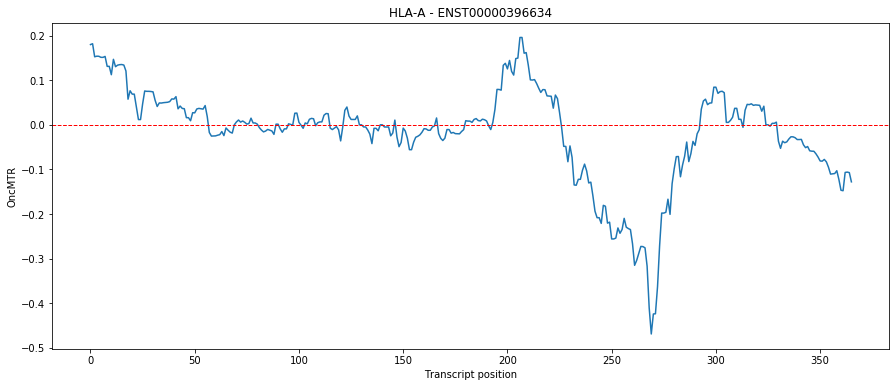

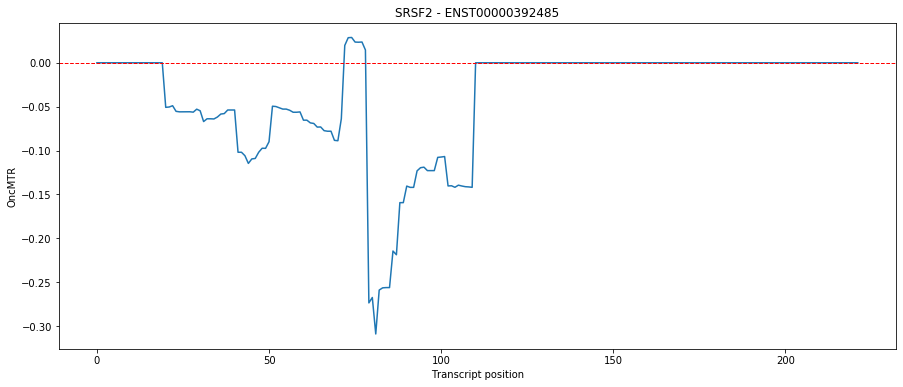

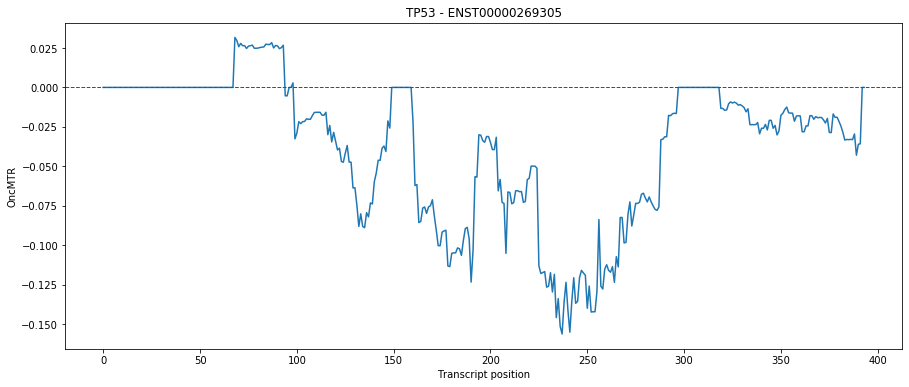

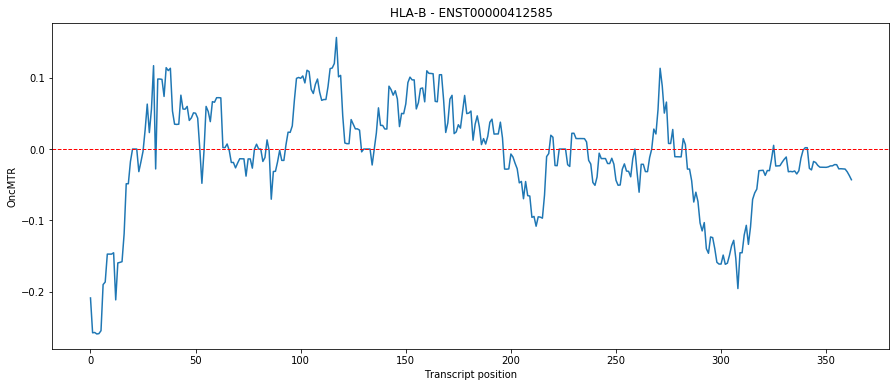

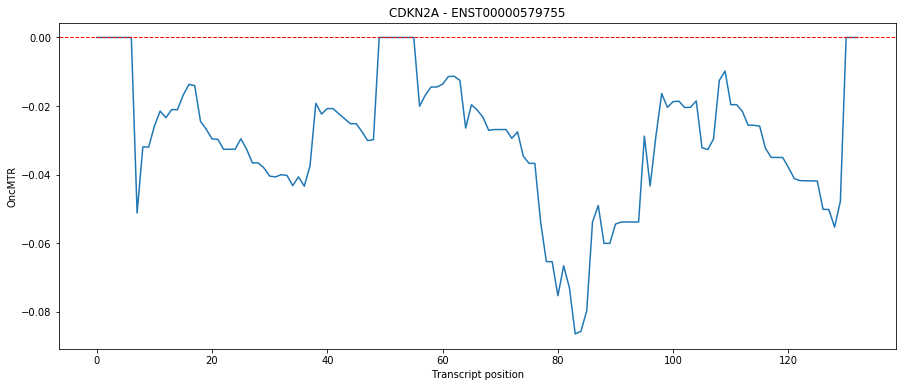

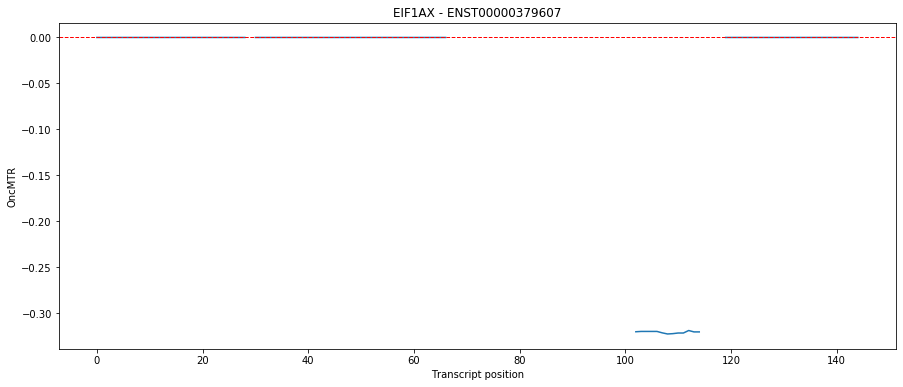

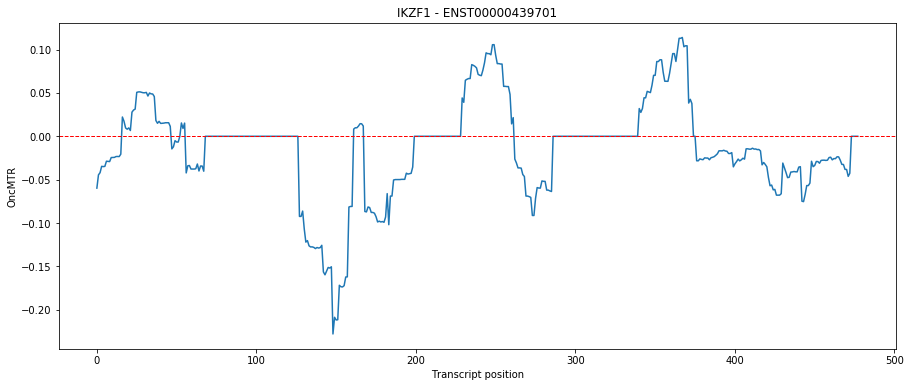

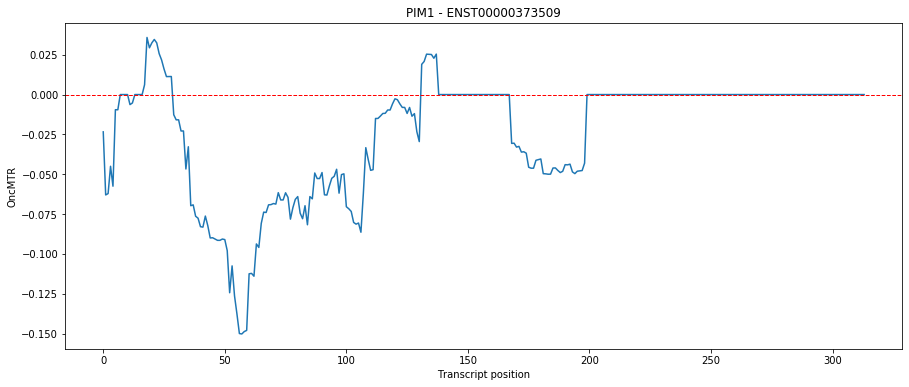

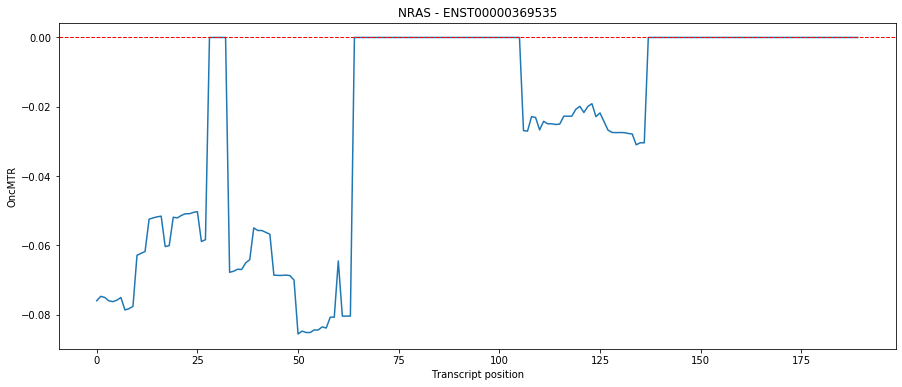

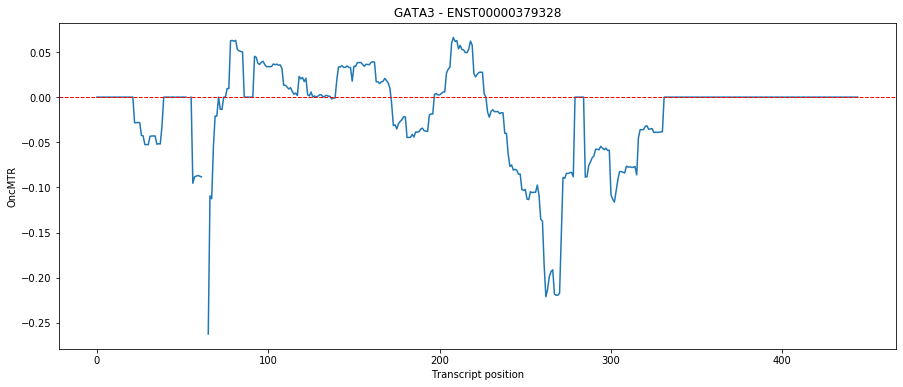

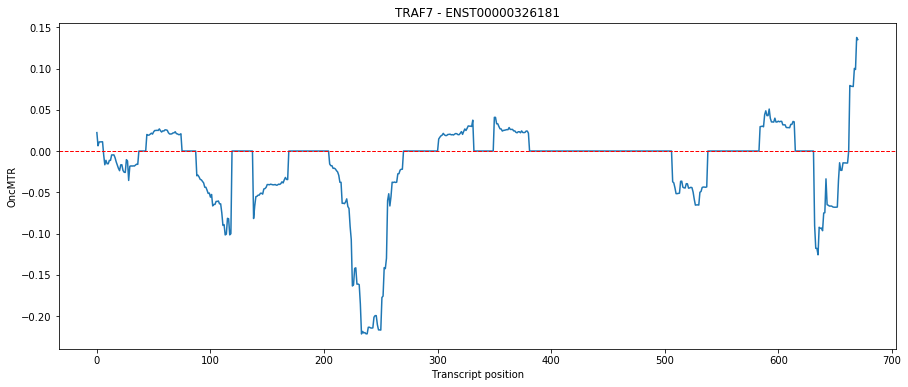

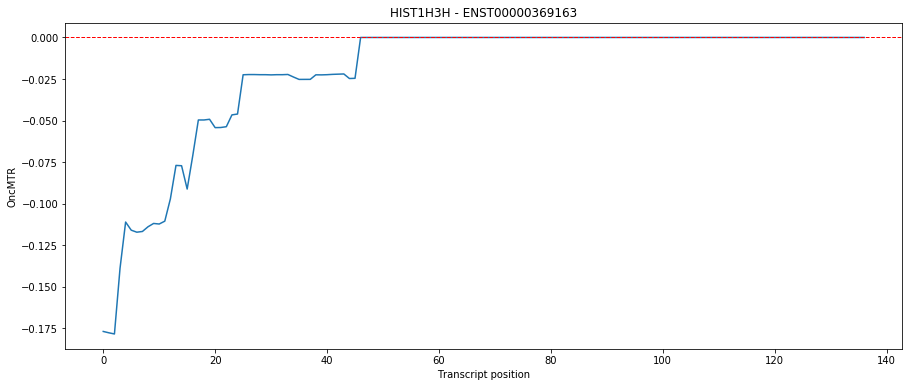

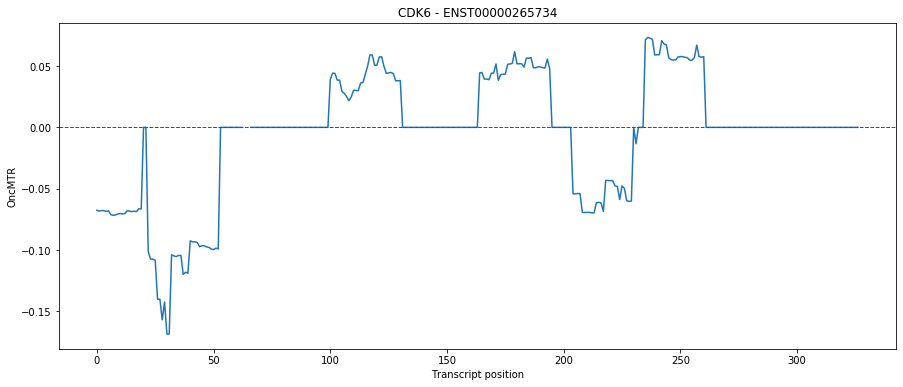

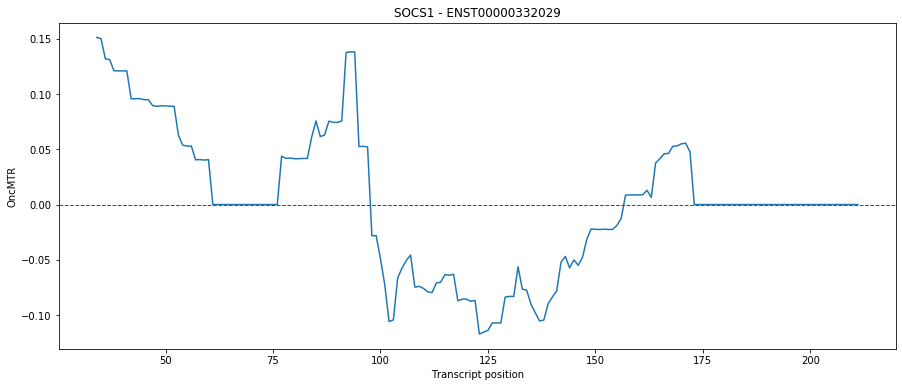

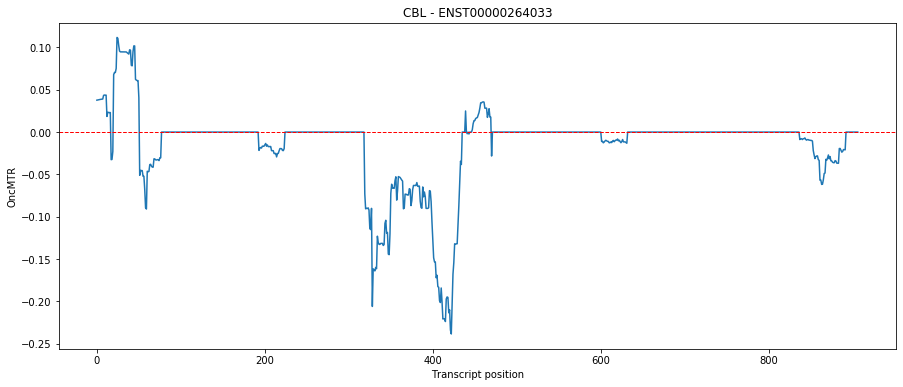

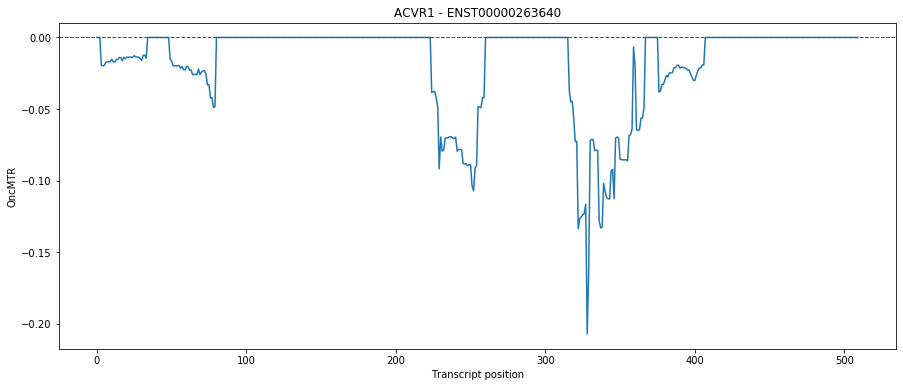

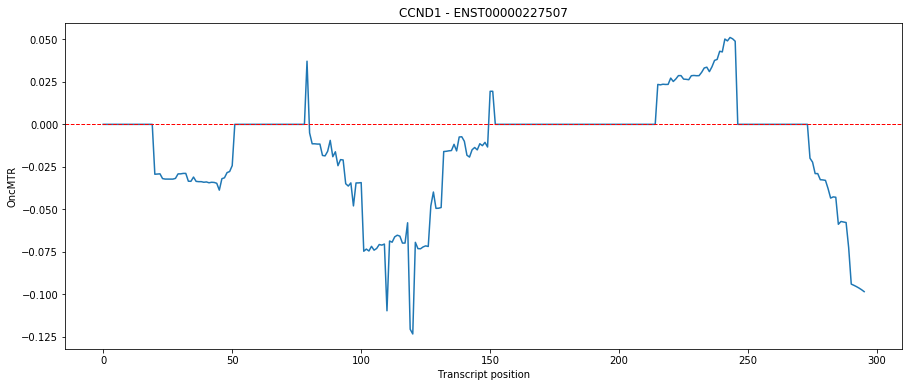

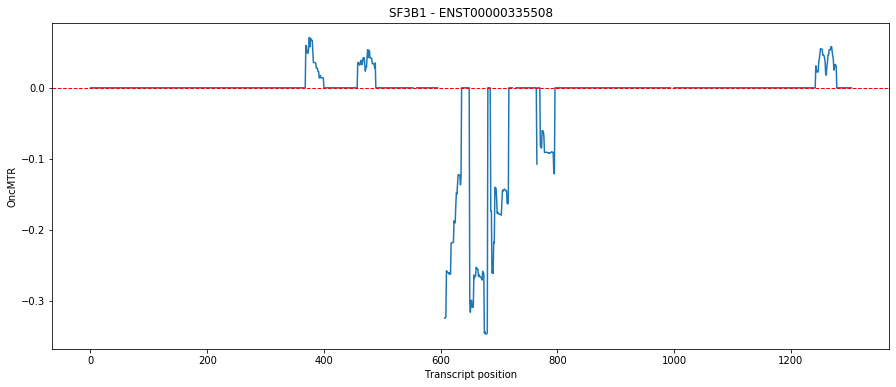

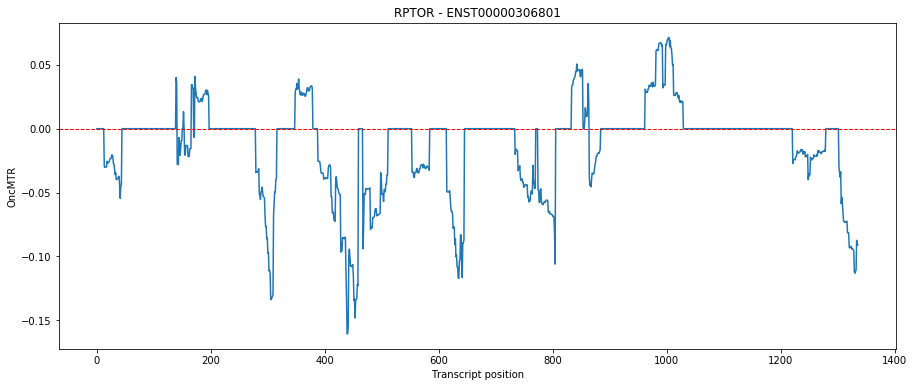

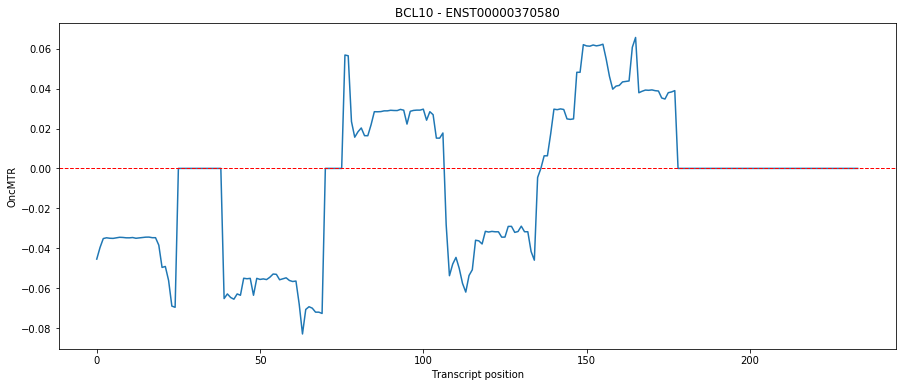

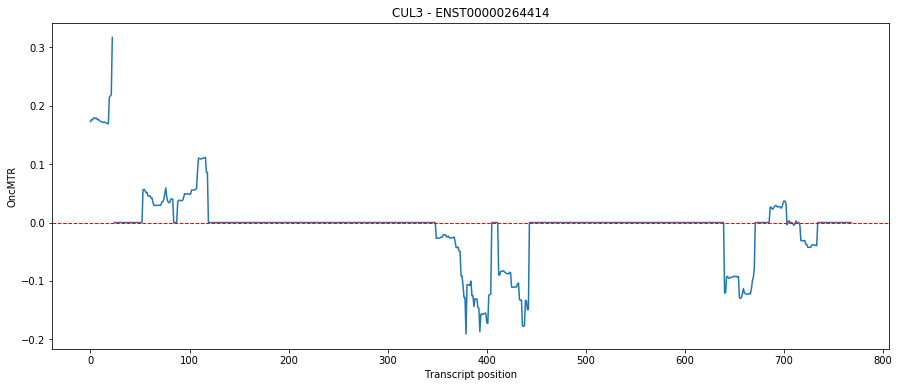

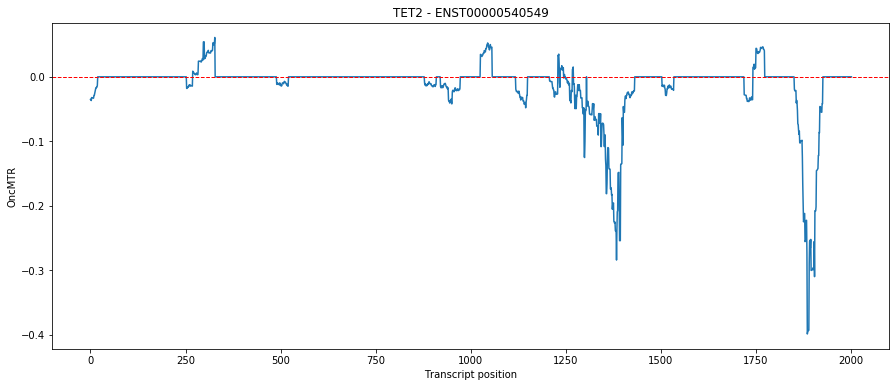

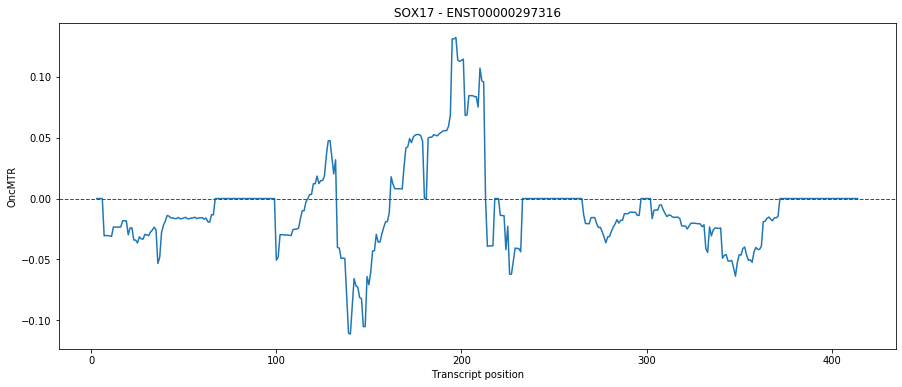

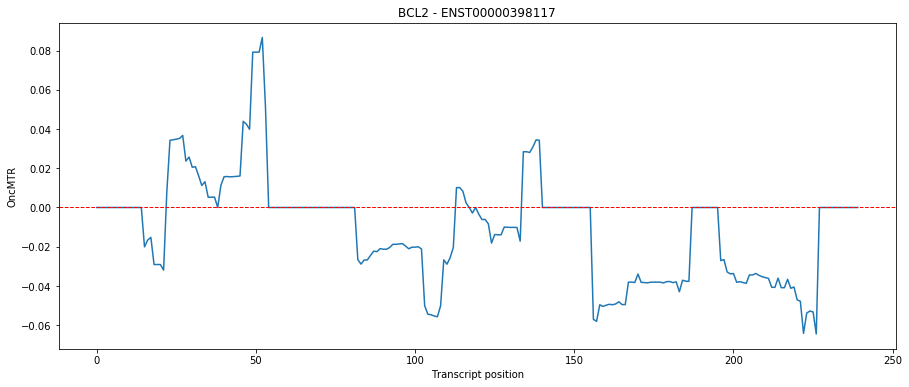

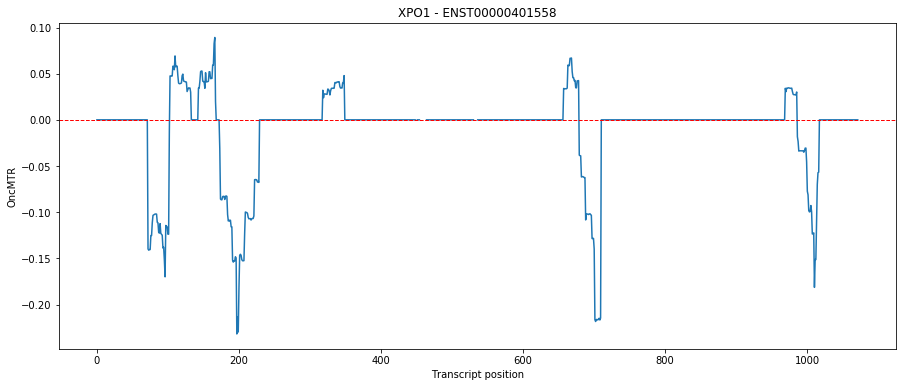

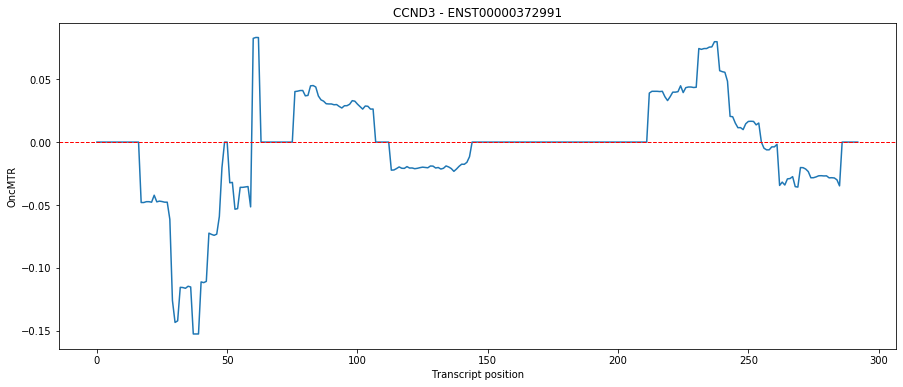

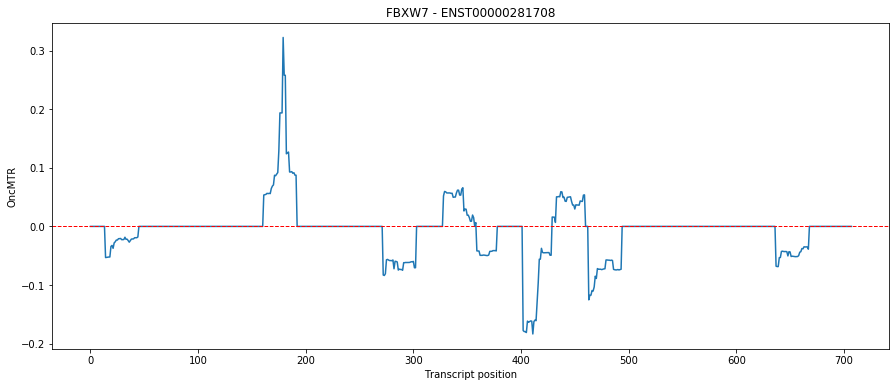

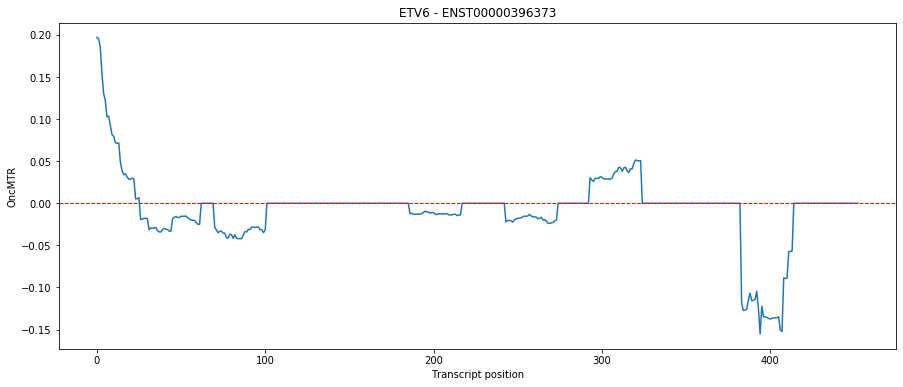

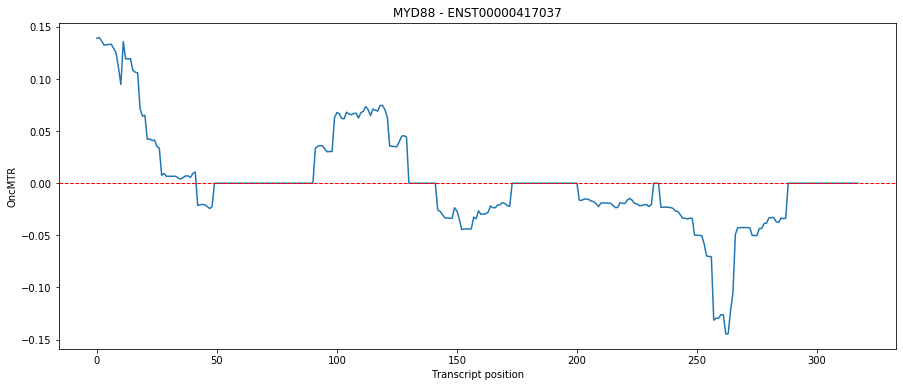

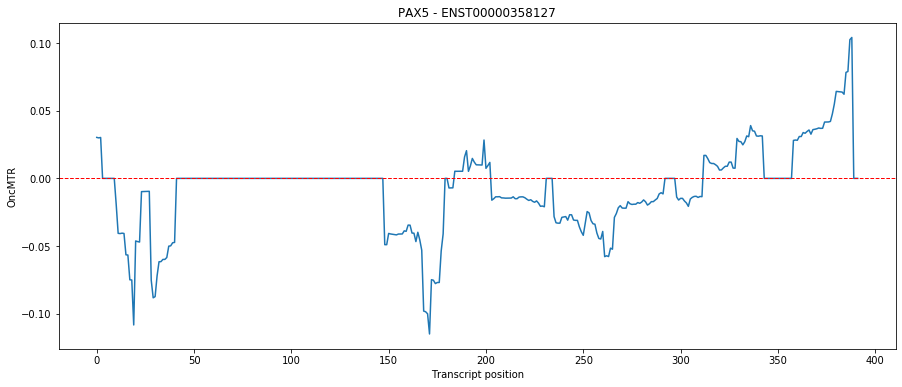

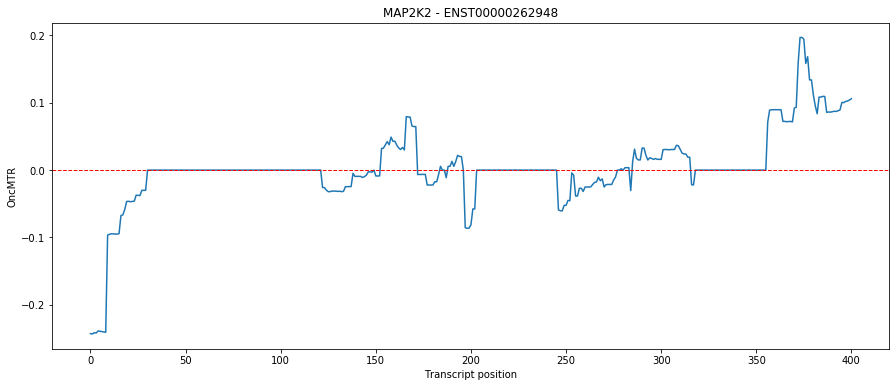

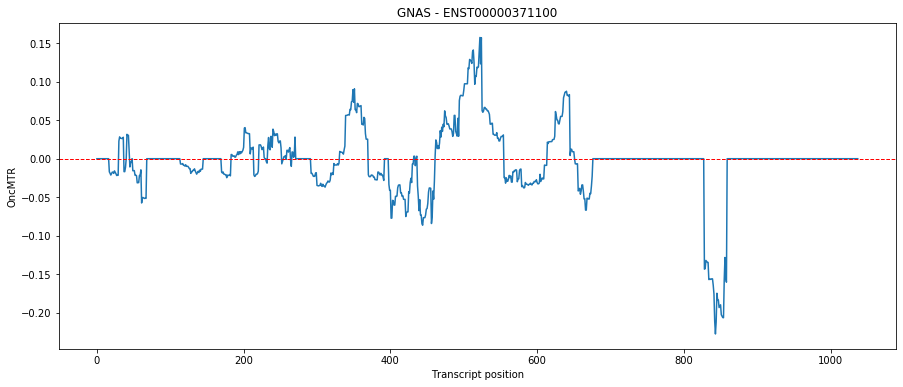

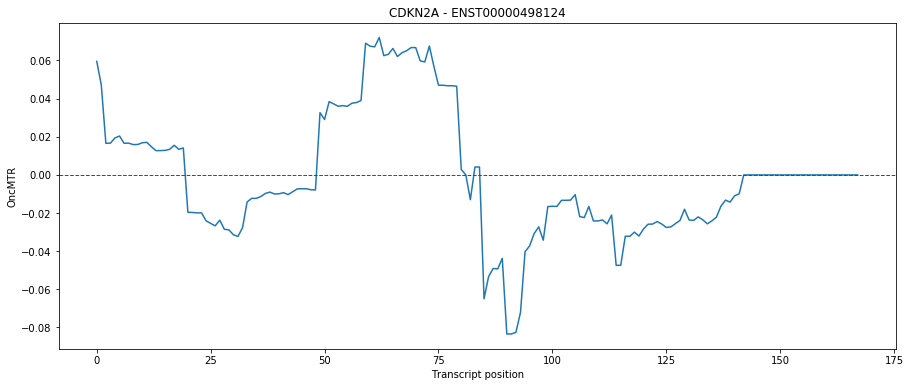

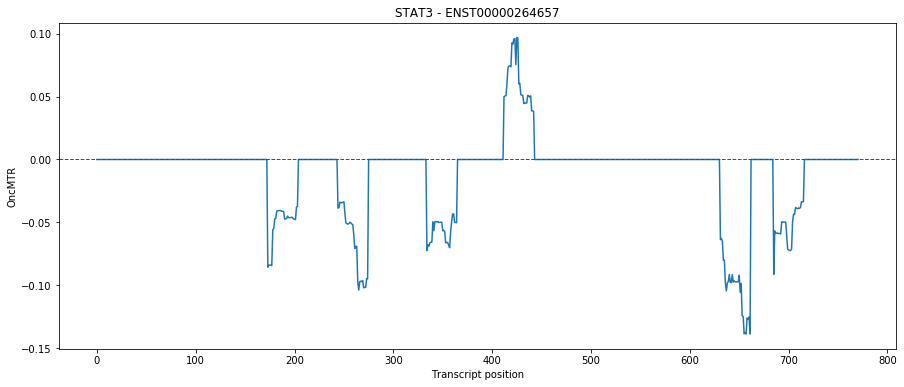

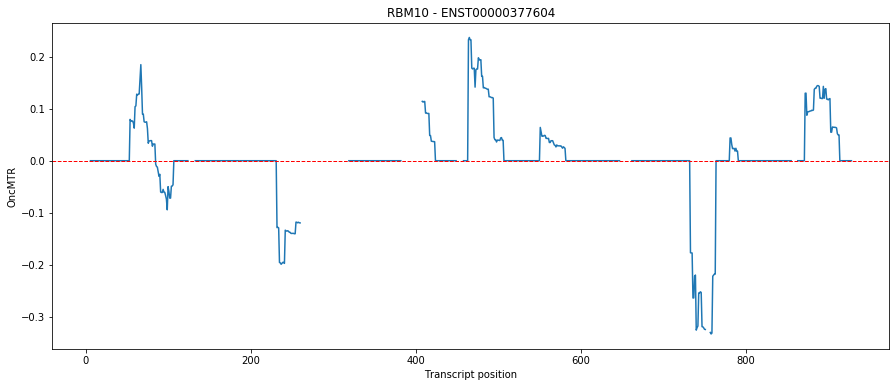

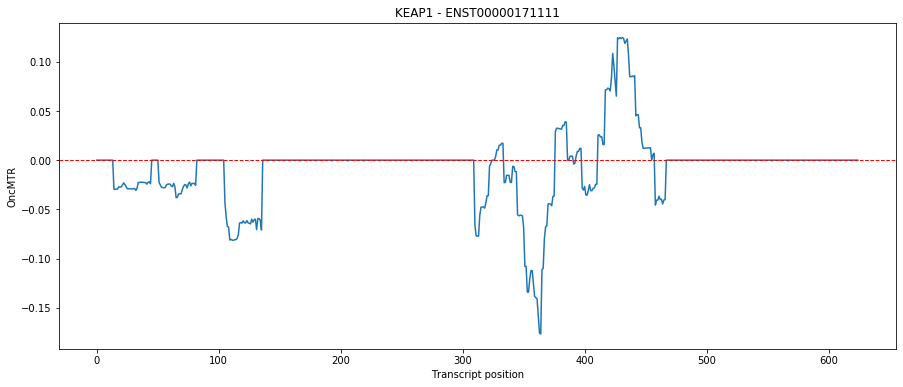

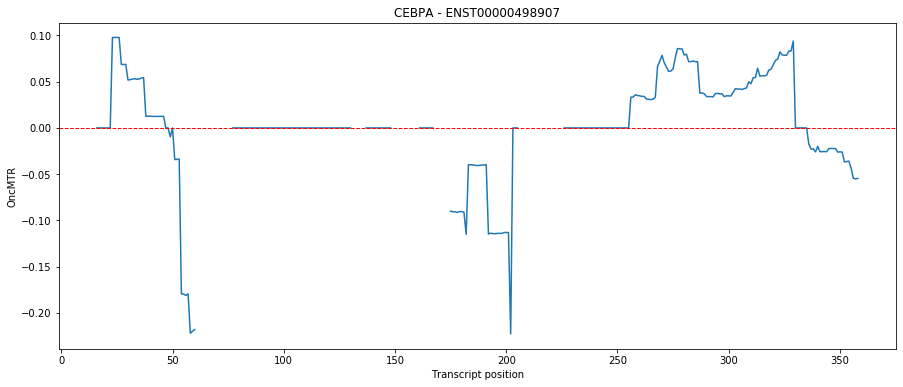

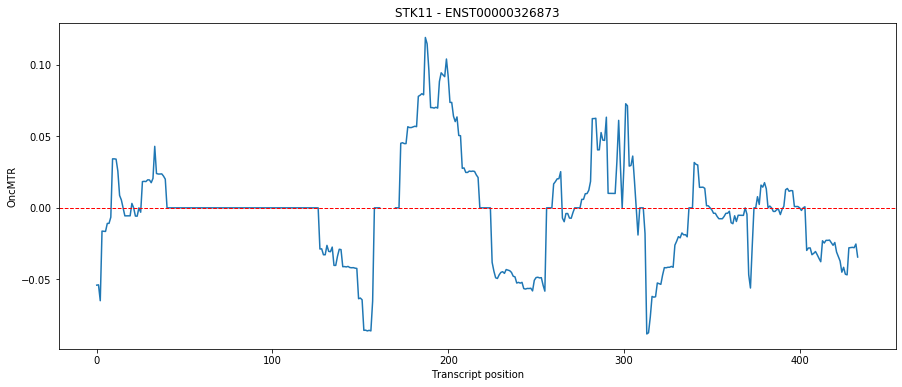

In [341]:
all_oncogenes = get_gene_dataset(gene_set)['enst_ids']
all_oncogenes_df = norm_df.loc[ norm_df.ENST.isin(all_oncogenes) ].copy()
all_oncogenes_df.sort_values(by=[oncmtr_dist_metric], inplace=True, axis=0, ascending=False)

plot_onmtr(enst_ids=all_oncogenes_df.head(40)['ENST'].values, method='single')

<br>
<hr>

# All genes

/opt/scp/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


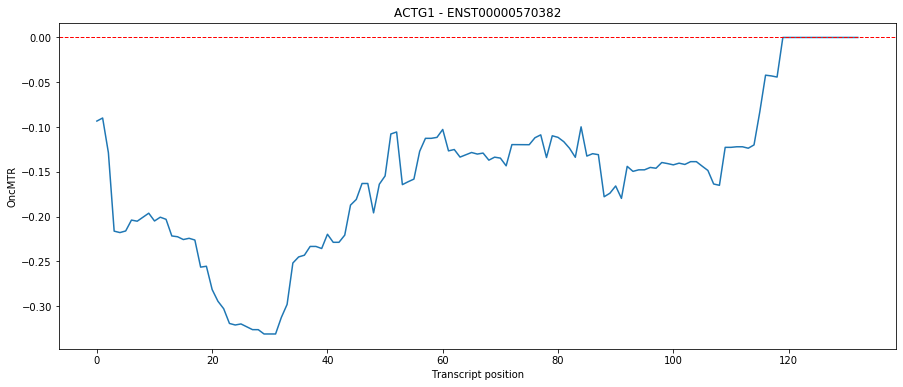

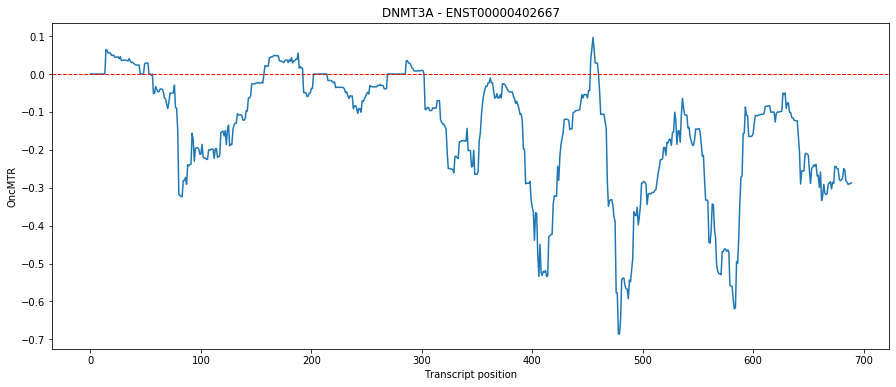

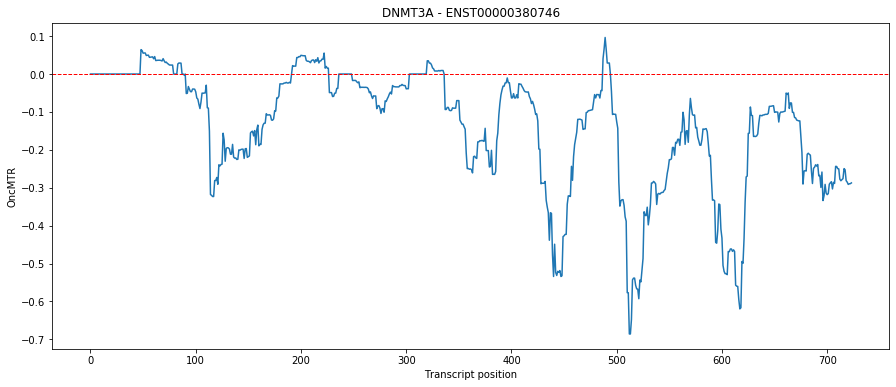

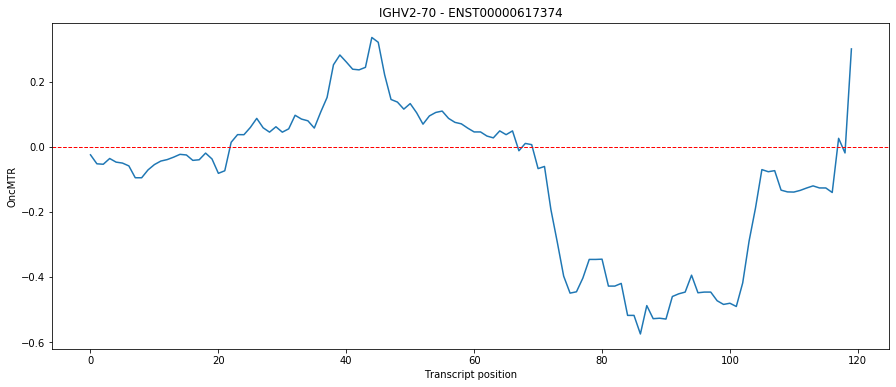

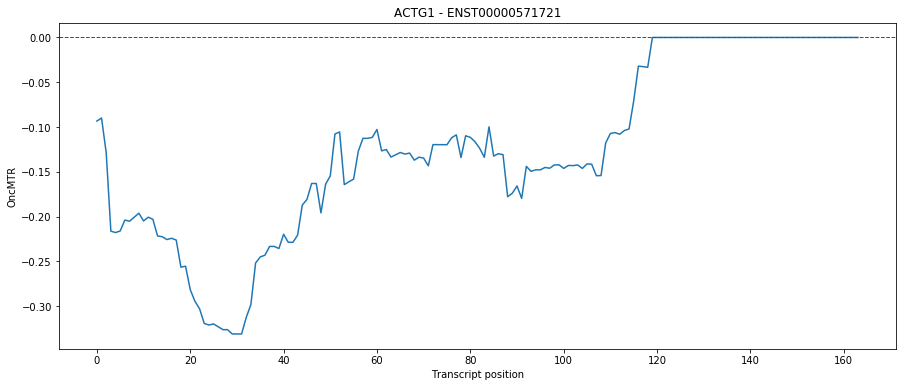

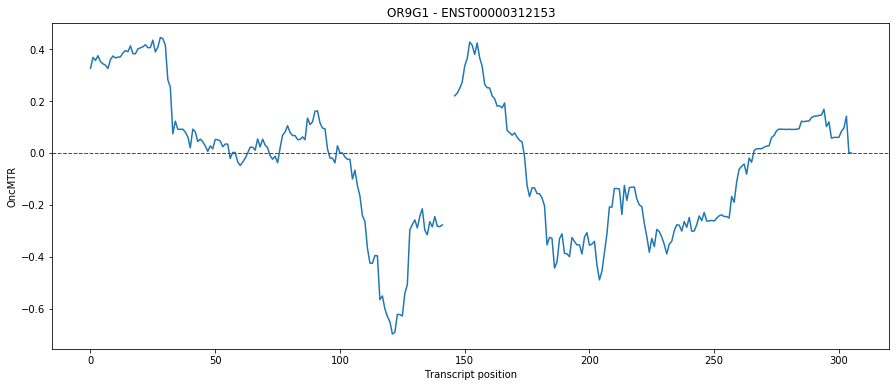

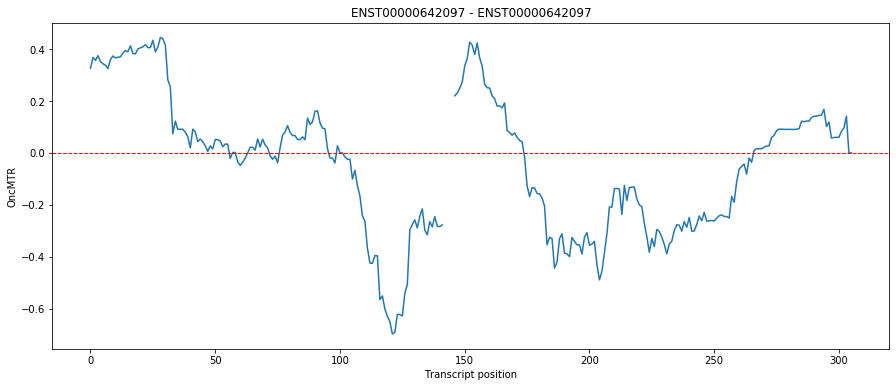

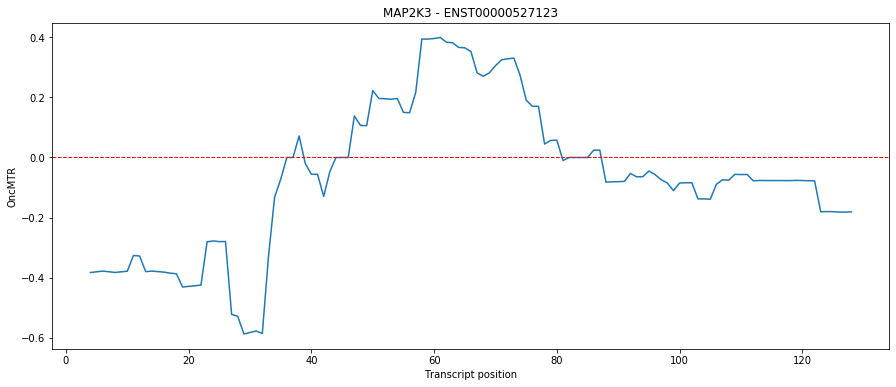

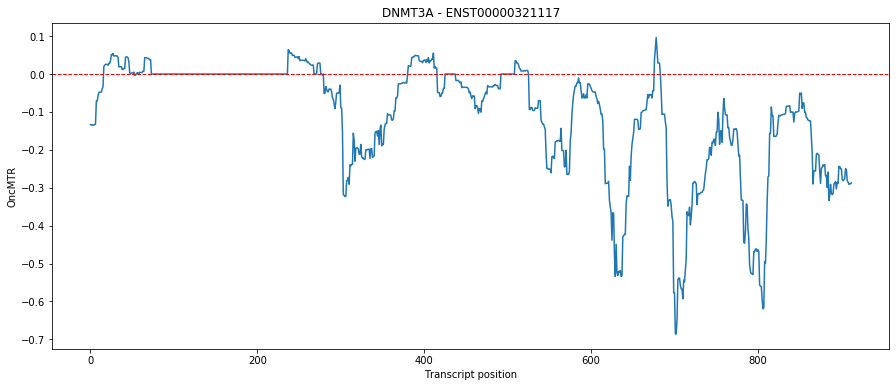

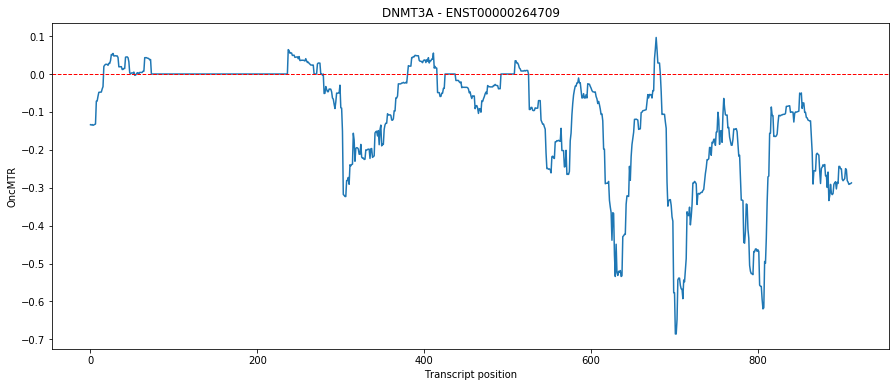

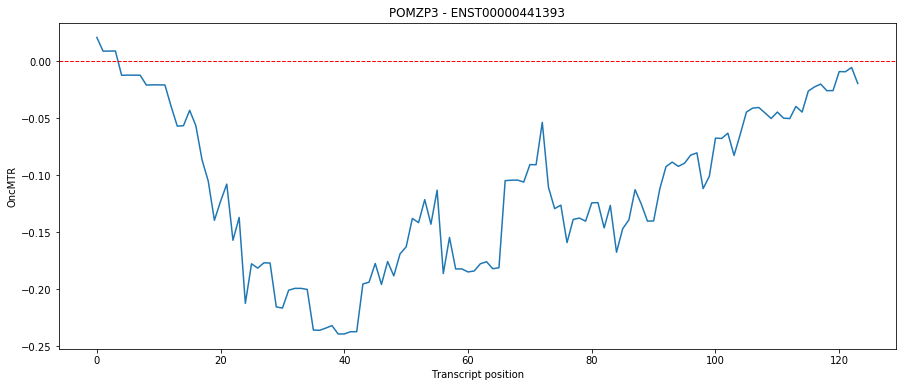

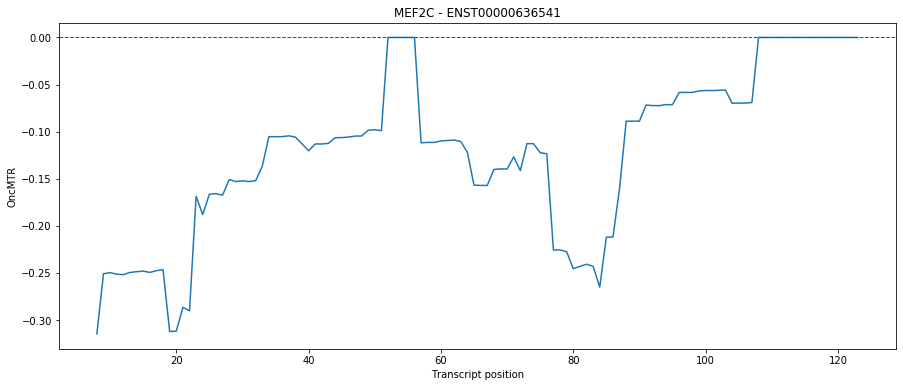

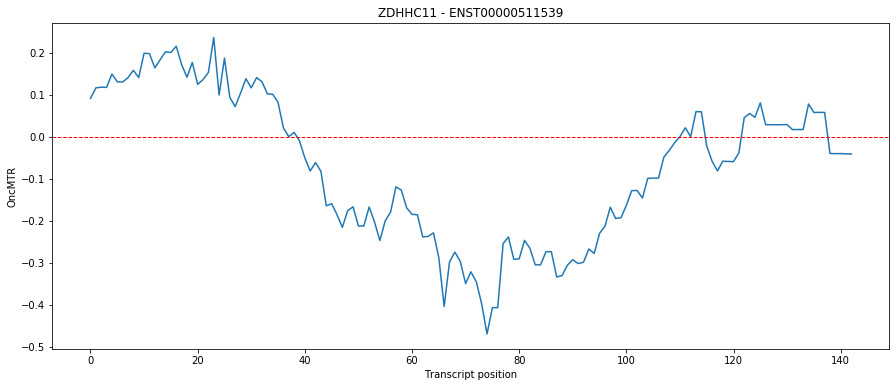

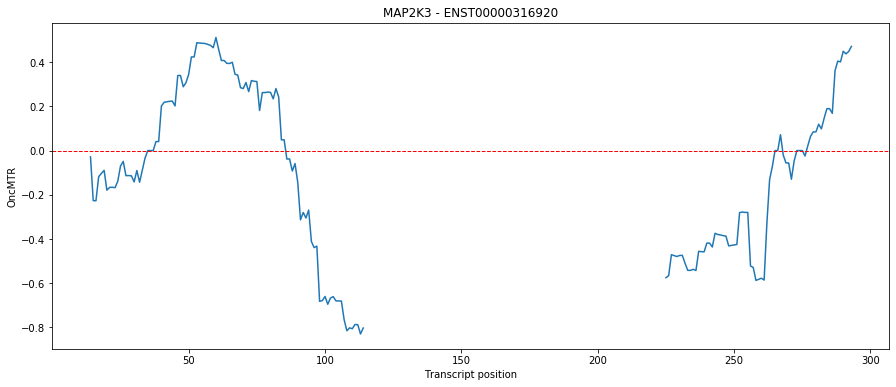

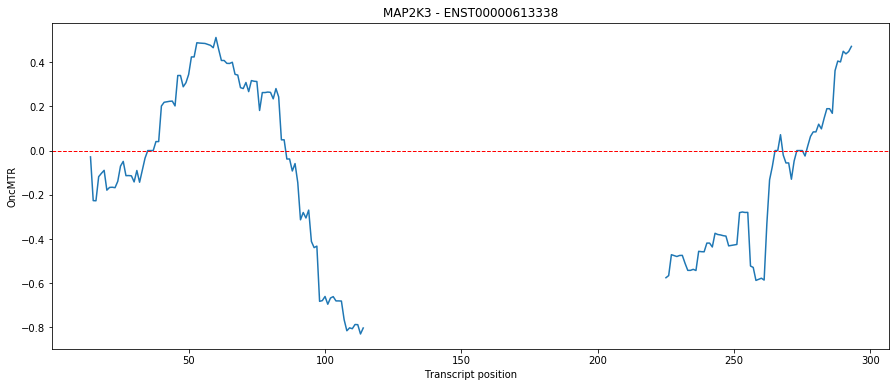

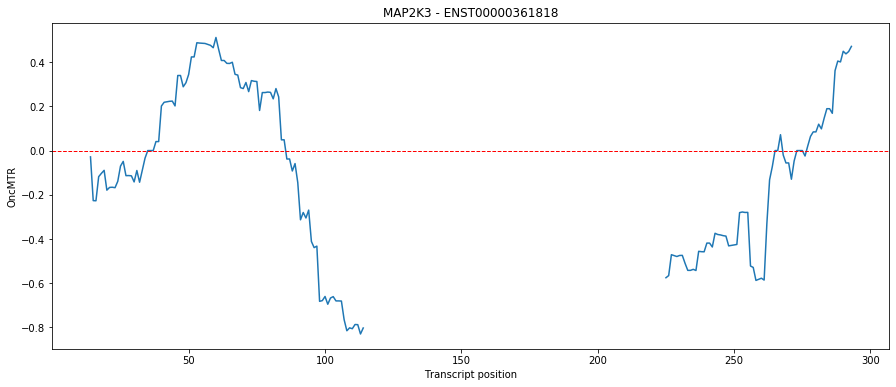

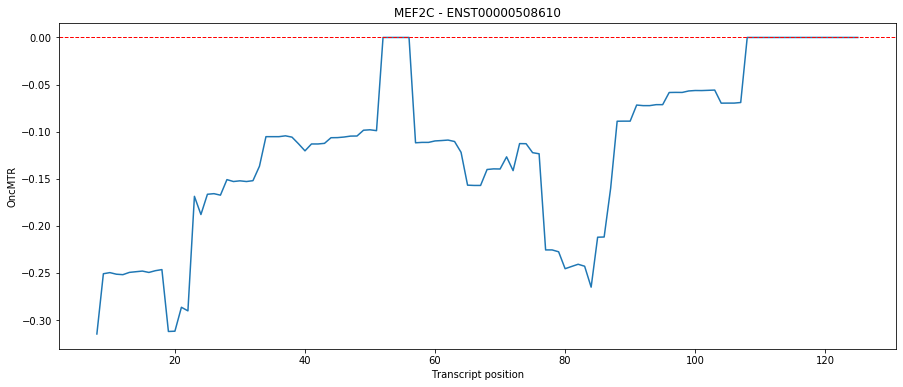

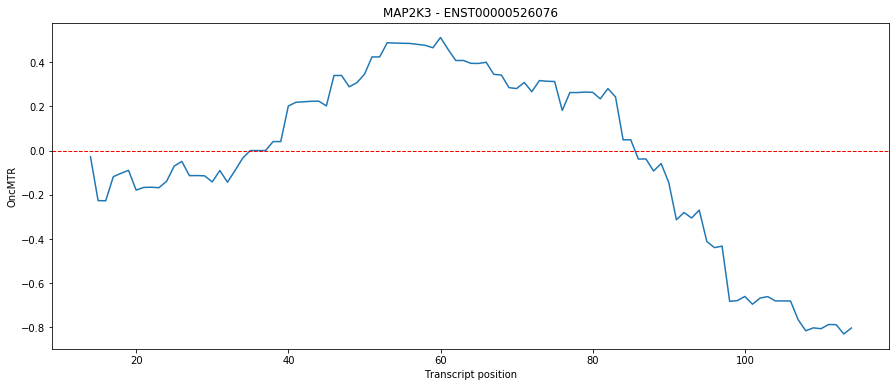

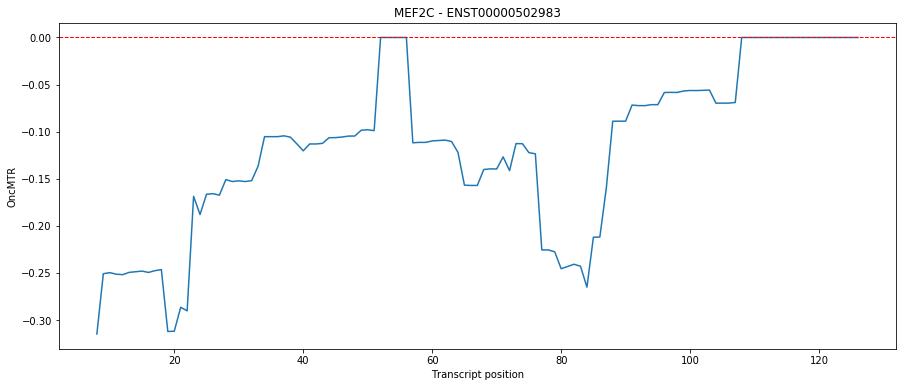

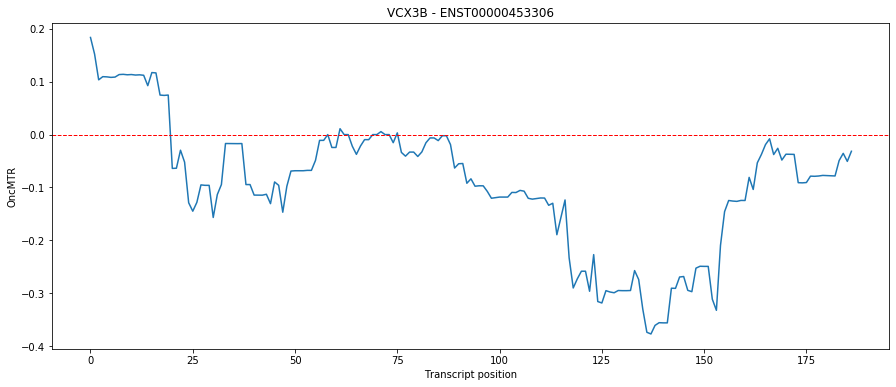

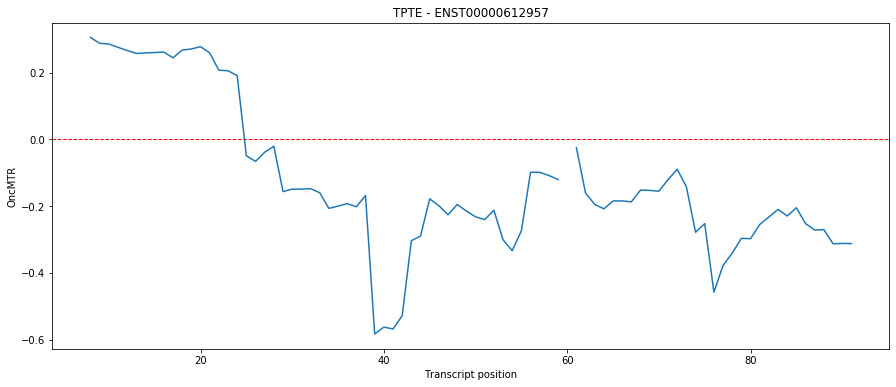

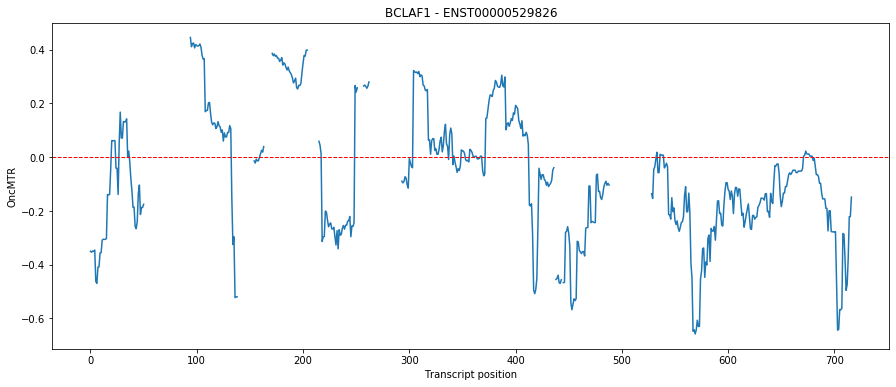

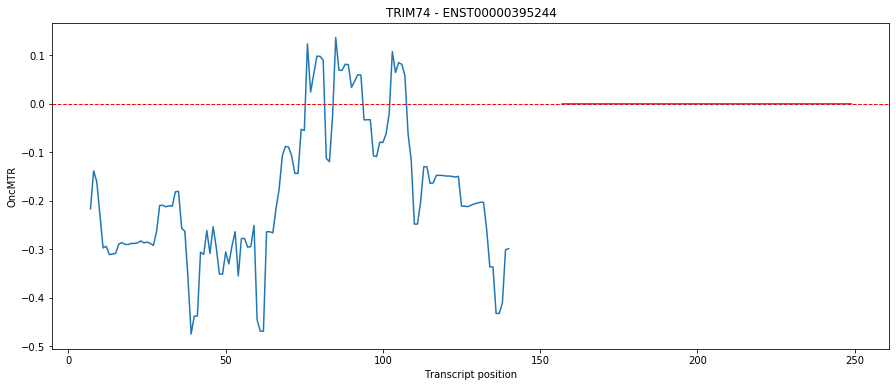

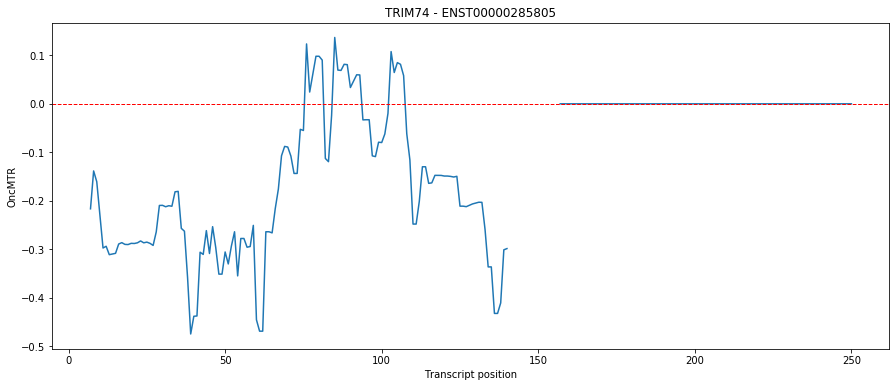

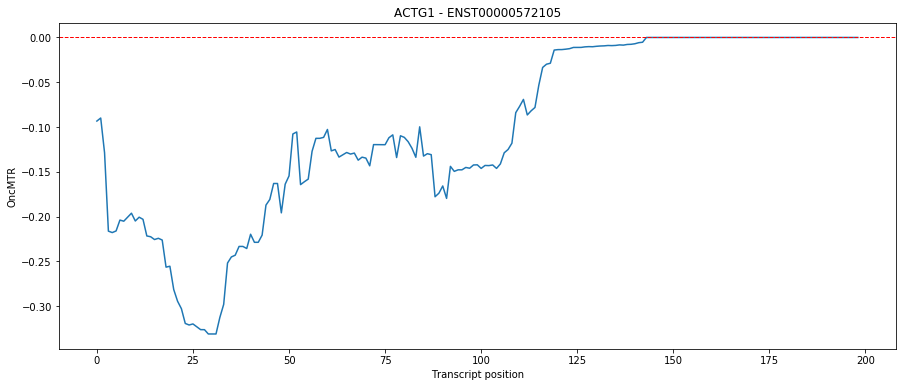

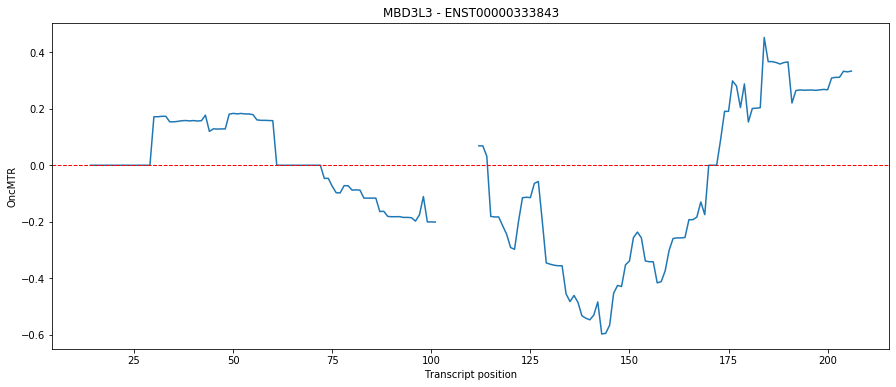

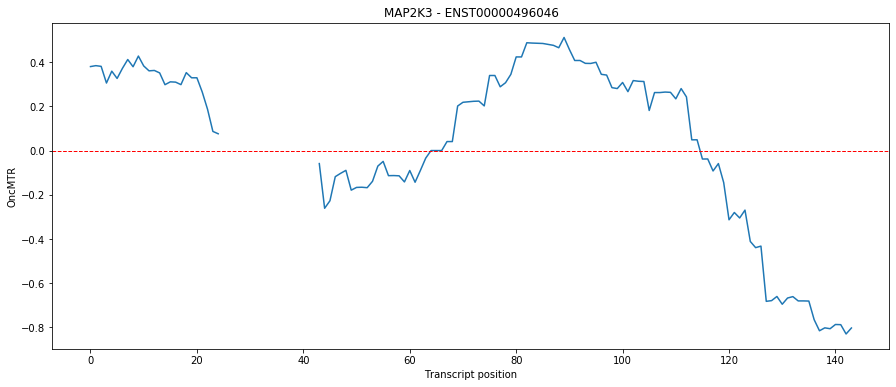

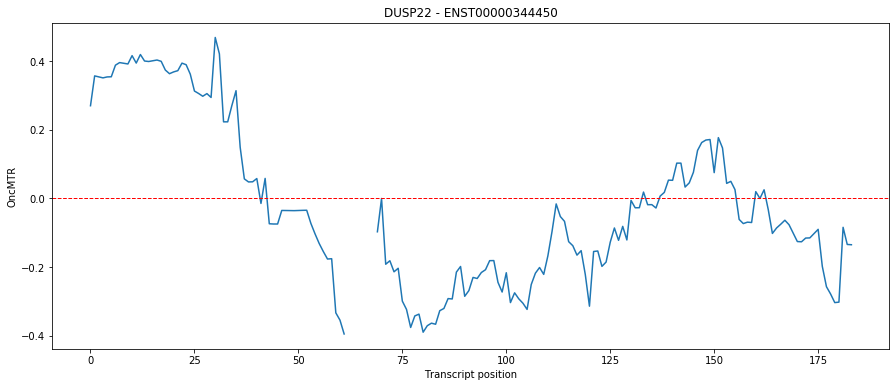

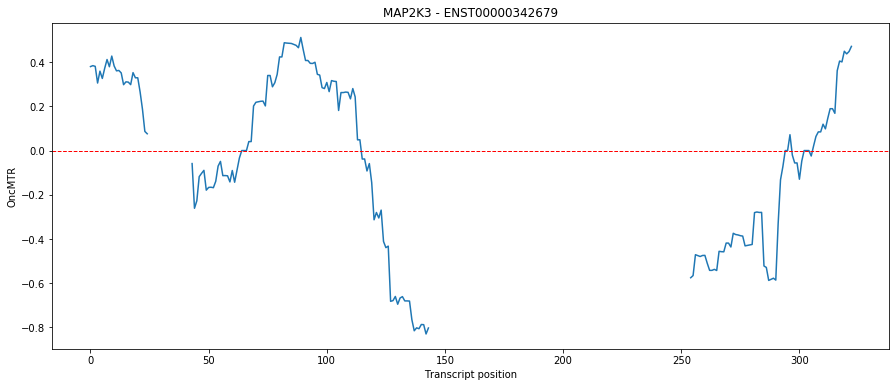

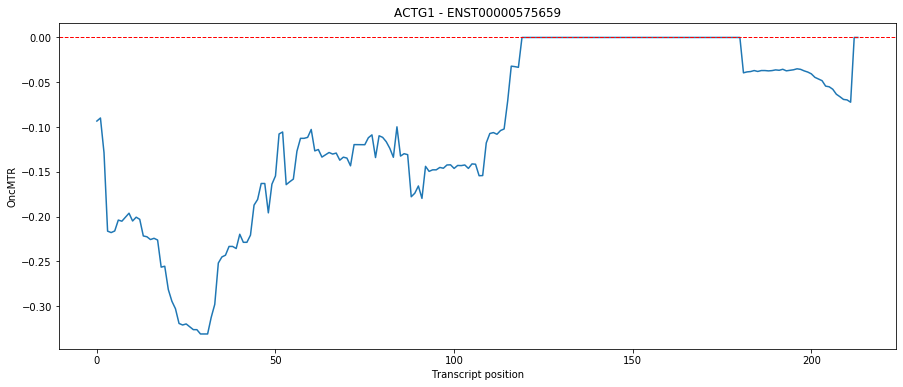

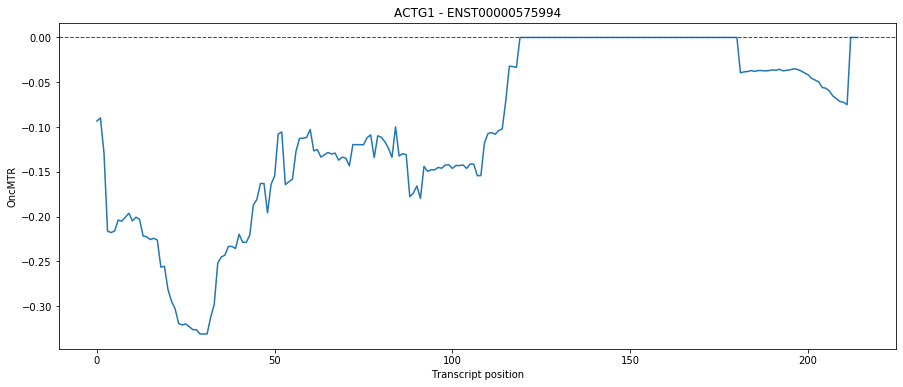

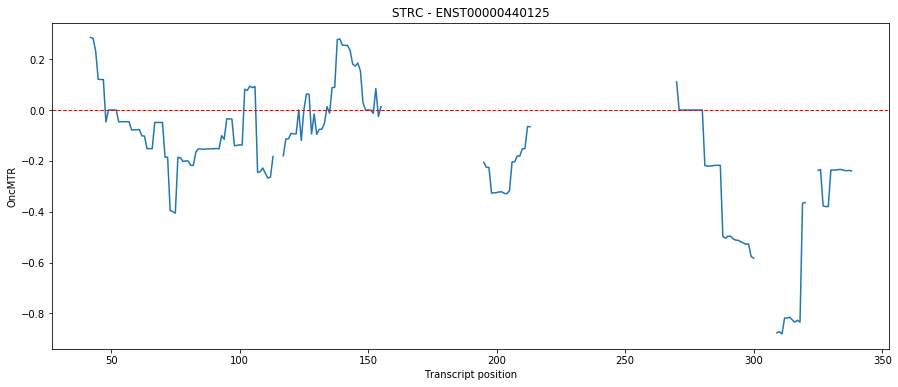

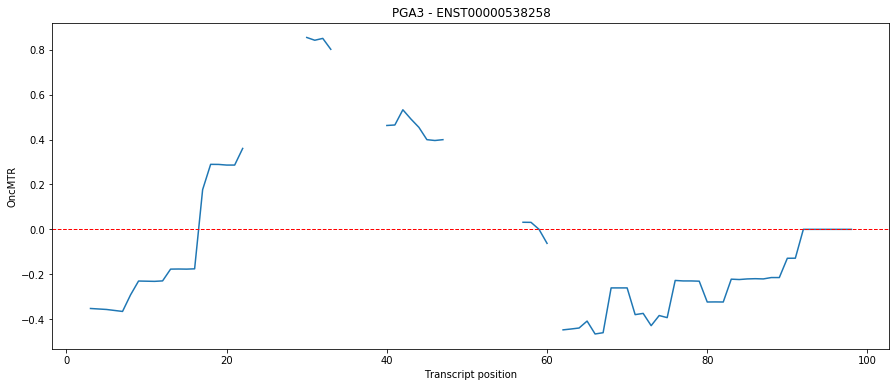

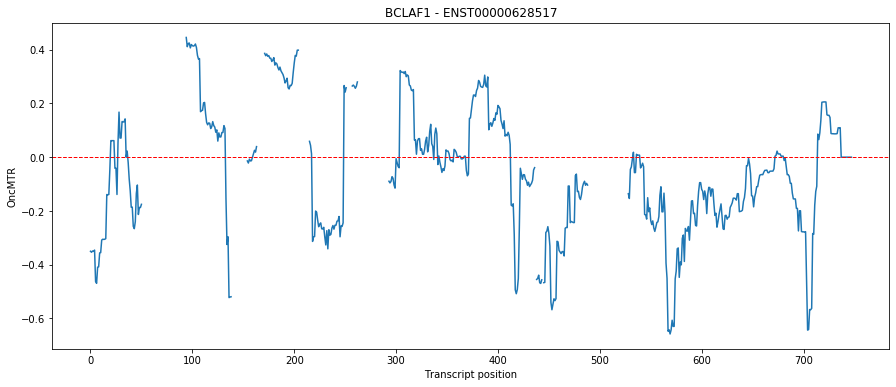

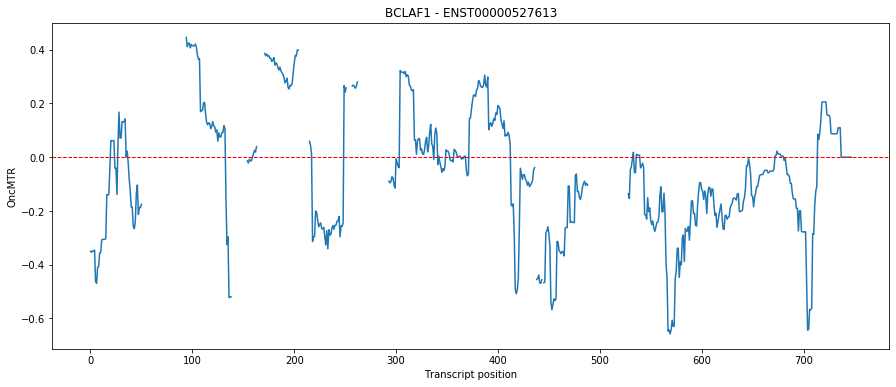

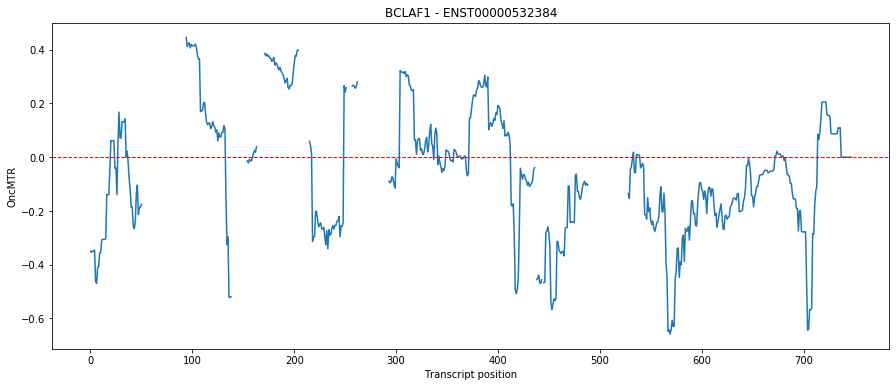

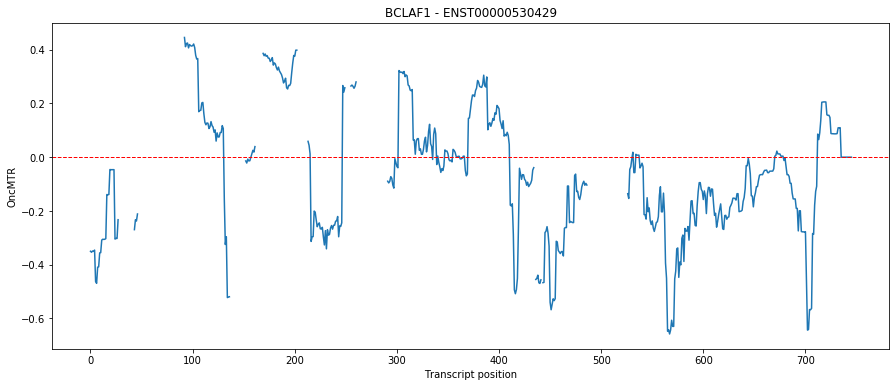

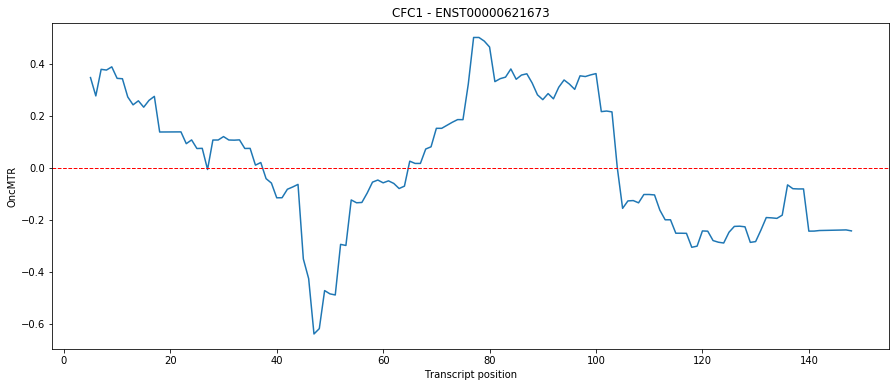

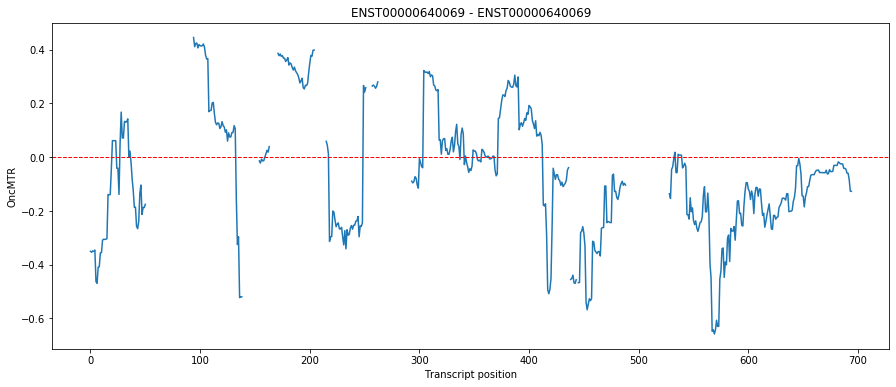

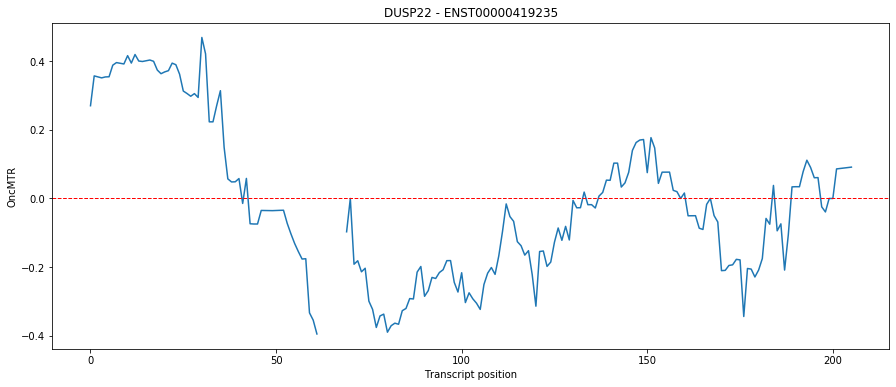

In [340]:
sorted_df = norm_df.sort_values(by=['cum_diff'], ascending=False)
sorted_df.reset_index(inplace=True, drop=True)

plot_onmtr(enst_ids=sorted_df.head(40)['ENST'].values, method='single')